# Lung Cancer Analysis & Prediction

<p style="text-align:justify; ">
    
<br>
<br>

</p>


## Sumário
    
|No  | Contents |No  | Contents  |
|:---| :---     |:---| :----     |
|1   | [<font color="#FFFFFF"> Importing Libraries</font>](#1)                   |12   | [<font color="#FFFFFF"> Correlation Heatmap</font>](#12)   |     
|2   | [<font color="#FFFFFF"> About Dataset</font>](#2)                         |13  | [<font color="#FFFFFF"> Preprocessing For Classification</font>](#13)|      
|3   | [<font color="#FFFFFF"> Basic Exploration</font>](#3)                     |14  | [<font color="#FFFFFF"> Logistic Regression Model</font>](#14)   |    
|4   | [<font color="#FFFFFF"> Dataset Summary</font>](#4)                       |15  | [<font color="#FFFFFF"> Gaussian Naive Bayes Model</font>](#15)    |       
|5   | [<font color="#FFFFFF"> Digging Deeper</font>](#5)      |16  | [<font color="#FFFFFF"> Bernoulli Naive Bayes Model</font>](#16)  |     
|6   | [<font color="#FFFFFF"> Custom Palette For Visualization</font>](#6)              |17  | [<font color="#FFFFFF"> Support Vector Machine Model</font>](#17)     |     
|7   | [<font color="#FFFFFF"> Positive Lung Cancer Cases</font>](#7)              |18  | [<font color="#FFFFFF"> Random Forest Model</font>](#18)     |
|8   | [<font color="#FFFFFF"> Positive Cases' Age Distribution</font>](#8)              |19  | [<font color="#FFFFFF"> K Nearest Neighbors Model</font>](#19)     |
|9   | [<font color="#FFFFFF"> Positive Cases' Gender Distribution</font>](#9)              |20  | [<font color="#FFFFFF"> Extreme Gradient Boosting Model</font>](#20)     |
|10   | [<font color="#FFFFFF"> Gender-wise Positive Cases' Reasons</font>](#10)              |21  | [<font color="#FFFFFF"> Neural Network Architecture</font>](#21)     |
|11   | [<font color="#FFFFFF"> Gender-wise Positive Cases' Symptoms</font>](#11)              |22  | [<font color="#FFFFFF"> Thank You</font>](#22)     |    
  

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Sobre a base de dados

* **GENDER :** M [Male] , F [Female]
* **AGE :** Age of patients
* **SMOKING :** 2 [Yes] , 1 [No]
* **YELLOW_FINGERS :** 2 [Yes] , 1 [No]  
* **ANXIETY :** 2 [Yes] , 1 [No]
* **PEER_PRESSURE :** 2 [Yes] , 1 [No]
* **CHRONIC DISEASE :** 2 [Yes] , 1 [No]
* **FATIGUE :** 2 [Yes] , 1 [No]
* **ALLERGY :** 2 [Yes] , 1 [No]
* **WHEEZING :** 2 [Yes] , 1 [No]
* **ALCOHOL CONSUMING :** 2 [Yes] , 1 [No]
* **COUGHING :** 2 [Yes] , 1 [No]
* **SHORTNESS OF BREATH :** 2 [Yes] , 1 [No]
* **SWALLOWING DIFFICULTY :** 2 [Yes] , 1 [No]
* **CHEST PAIN :** 2 [Yes] , 1 [No]
* **LUNG_CANCER :** YES [Positive] , NO [Negative]

* AGE - The dataset is mostly of elderly people with mean and median both around 62 years. Although low age groups are also present. Minimum being - 21 years.
* SMOKING - The dataset is mostly composed of people who smokes. Inferred from mean. As values are either 1 or 2 mean should be 1.5 if perfectly balanced.
* YELLOW_FINGERS - The dataset is mostly composed of people with yellow fingers. Inferred from mean.
* ANXIETY - The dataset mostly consists of individuals who report experiencing anxiety symptoms. The dataset is balanced in this regard.
* PEER_PRESSURE - The dataset mostly consists of individuals who reported being influenced by peer pressure. The dataset is balanced in this regard.
* CHRONIC_DISEASE - The dataset mostly consists of individuals who reported having a chronic disease. The dataset is balanced in this regard.
* FATIGUE - The dataset mostly composes of people with signs of fatigueness.
* ALLERGY - The dataset mostly composes of people with allergy.
* WHEEZING - The dataset mostly composes of people with wheezing symptom.
* ALCOHOL CONSUMING - The dataset mostly composes of people who consumes alcohol.
* COUGHING - The dataset mostly composes of people with coughing symptom.
* SHORTNESS OF BREATH - The dataset mostly composes of people with shortness of breath.
* SWALLOWING DIFFICULTY - The dataset mostly composes of people with not having difficulty with swallowing.
* CHEST PAIN - The dataset mostly composes of people with chest pain.

In [ ]:
data = pd.read_csv("survey_lung_cancer.csv")

## Basic Analysis Exploration

In [ ]:
print(f"Shape of The Dataset : {data.shape}")
print(f"\nGlimpse of The Dataset :")
data.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (309, 16)

Glimpse of The Dataset :


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
print(f"Informations About The Dataset :\n")
print(data.info())

Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    i

### Dataset Summary:

In [ ]:
print(f"Summary of This Dataset :")
data.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Summary of This Dataset :


,count,mean,std,min,25%,50%,75%,max
AGE,309.000000,62.673139,8.210301,21.000000,57.000000,62.000000,69.000000,87.000000
SMOKING,309.000000,1.563107,0.496806,1.000000,1.000000,2.000000,2.000000,2.000000
YELLOW_FINGERS,309.000000,1.569579,0.495938,1.000000,1.000000,2.000000,2.000000,2.000000
ANXIETY,309.000000,1.498382,0.500808,1.000000,1.000000,1.000000,2.000000,2.000000
PEER_PRESSURE,309.000000,1.501618,0.500808,1.000000,1.000000,2.000000,2.000000,2.000000
CHRONIC DISEASE,309.000000,1.504854,0.500787,1.000000,1.000000,2.000000,2.000000,2.000000
FATIGUE,309.000000,1.673139,0.469827,1.000000,1.000000,2.000000,2.000000,2.000000
ALLERGY,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000
WHEEZING,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000
ALCOHOL CONSUMING,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000


In [ ]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
GENDER,309,2,M,162
LUNG_CANCER,309,2,YES,270


In [ ]:
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Here, we can see there is **no null value** exists in this dataset. Let's check if there exists any duplicate entry in this dataset. If exists then we will remove them from the dataset. After that we will initialize the visualization style and custom pallete for visualization.

In [ ]:
dup = data[data.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There are 33 duplicate entries among 309 entries in this dataset.

After removing duplicate entries there are 276 entries in this dataset.


We can see that there are now 238 positive cases of Lung Cancer and therefore 38 Negative cases of Lung Cancer

In [ ]:
data_temp = data.copy()
data_temp.describe(include=object).T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
GENDER,276,2,M,142
LUNG_CANCER,276,2,YES,238


### Olhando profundamente



In [ ]:
data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Male" , "F" : "Female"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Yes" , 1 : "No"})

data_temp.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


Paleta para visualização

In [ ]:
sns.set_style("whitegrid")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#7fa653","#333533","#202020"]

#sns.palplot(sns.color_palette(palette))
#plt.show()

### Casos positivos para câncer de pulmão

Vamos criar um novo dataframe com apenas dados de casos positivo.

In [ ]:
data_temp_pos = data_temp[data_temp["LUNG_CANCER"] == "YES"]
data_temp_pos.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES


### Distribuição de idades para os casos positivos.

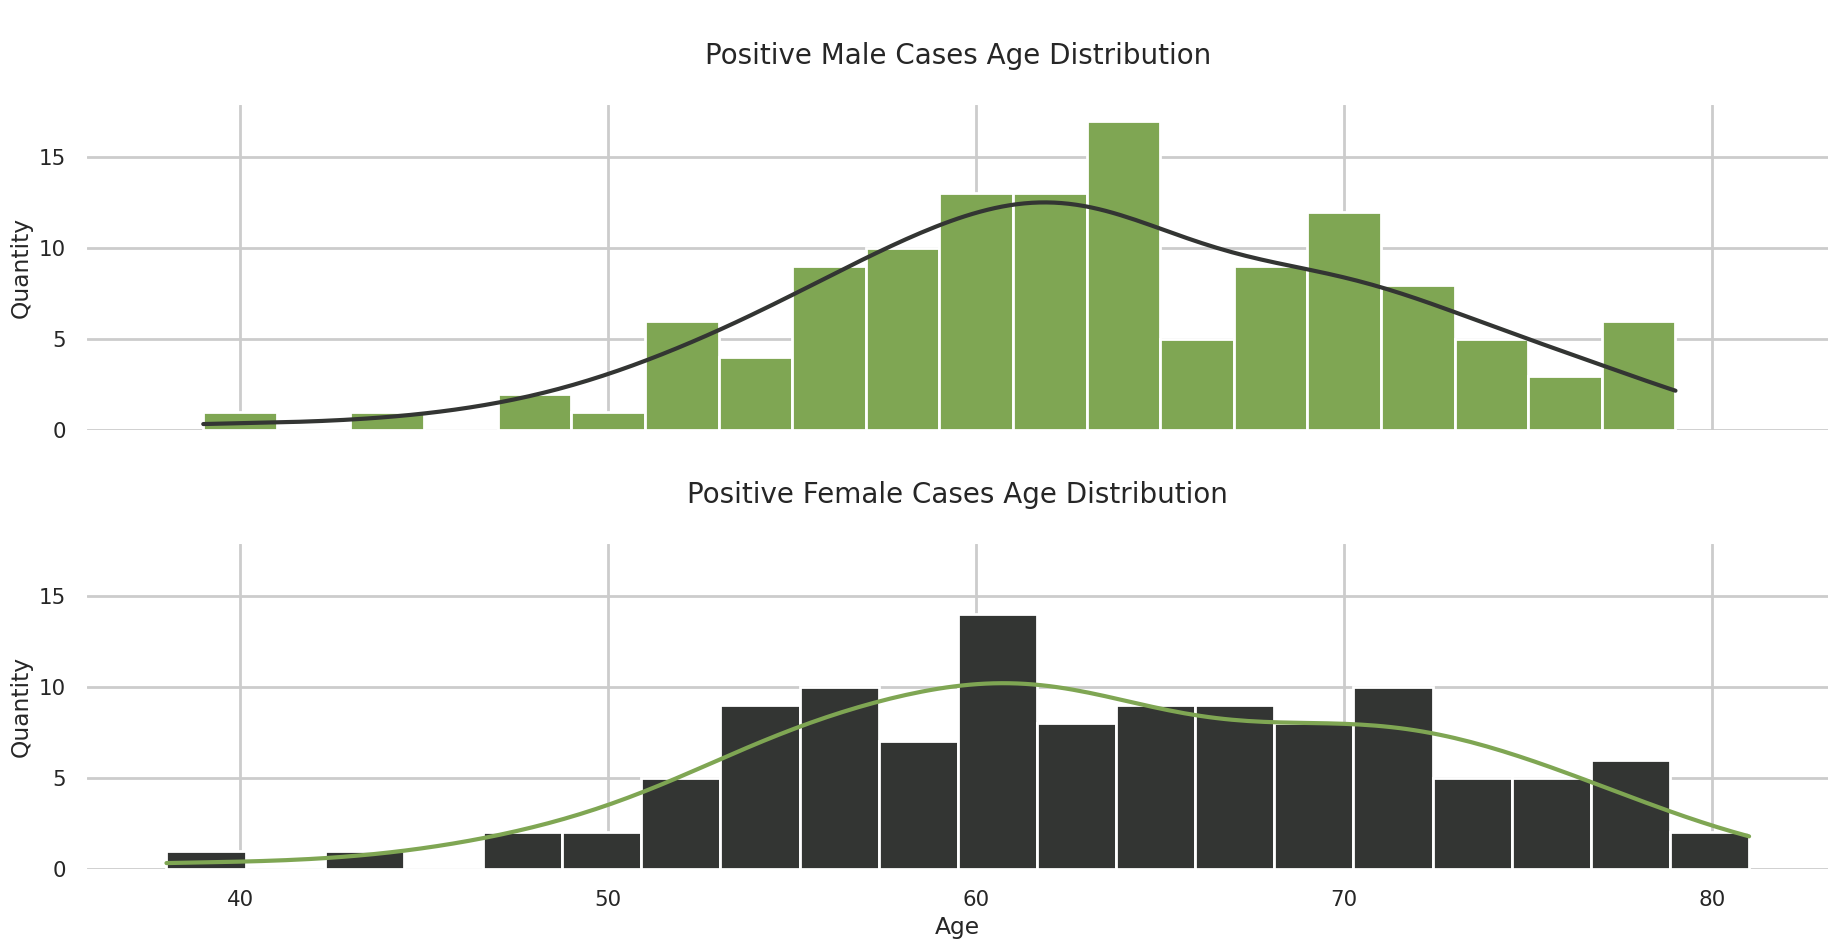

In [ ]:
_, axs = plt.subplots(2,1,figsize=(20,10),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["AGE"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nPositive Male Cases Age Distribution\n",fontsize=20)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Quantity")

sns.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["AGE"],color=palette[12],kde=True,ax=axs[1],bins=20,alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\nPositive Female Cases Age Distribution\n",fontsize=20)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Quantity")

sns.despine(left=True, bottom=True)
plt.show()

**Vamos juntá-los na mesma figura.**

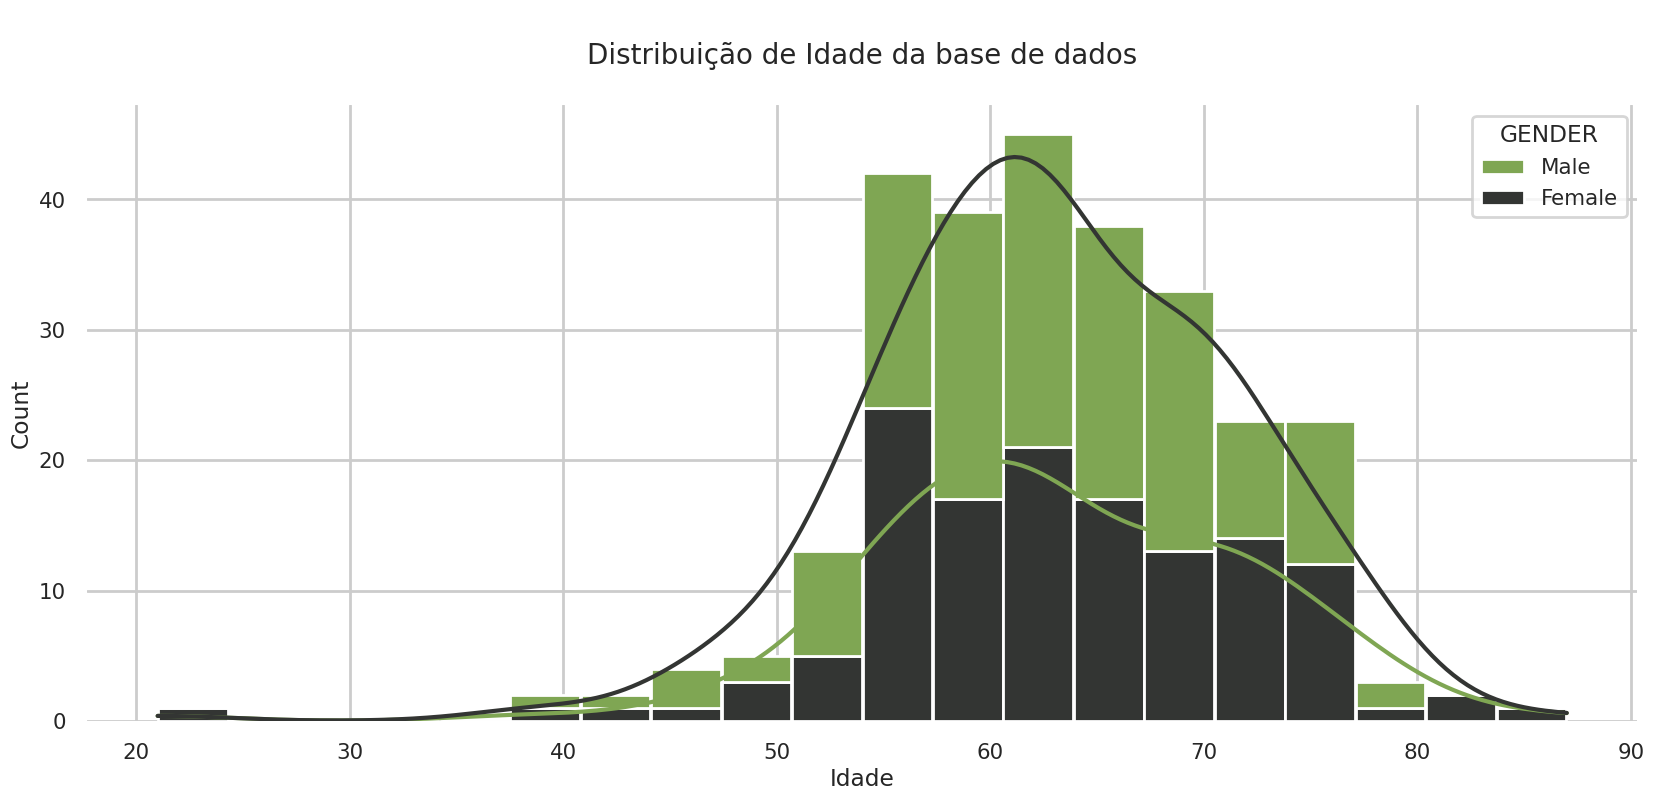

In [ ]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data_temp,x="AGE",hue="GENDER",multiple="stack",palette=palette[11:13],kde=True,shrink=.99,bins=20,alpha=1,fill=True)
p.axes.lines[0].set_color(palette[11])
p.axes.lines[1].set_color(palette[12])
p.axes.set_title("\nDistribuição de Idade da base de dados\n",fontsize=20)
plt.ylabel("Count")
plt.xlabel("Idade")

sns.despine(left=True, bottom=True)
plt.show()

### Distribuição de gêneros em casos positivos

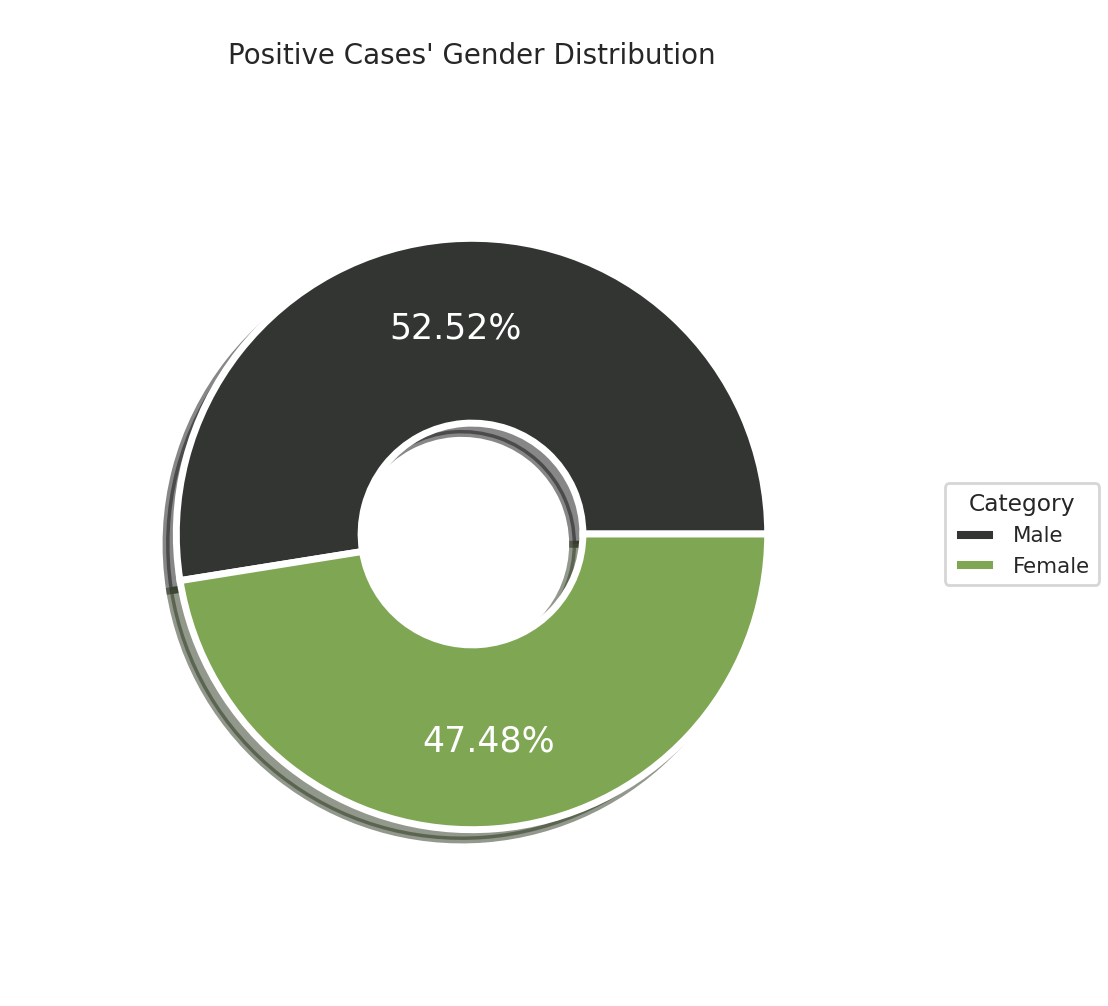

In [ ]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([len(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["GENDER"]),
                                    len(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["GENDER"])],
                                    explode = (0,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.7,
                                    radius=.8,
                                    colors = ["#333533","#7fa653"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white",
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nPositive Cases' Gender Distribution",fontsize=20)
plt.show()

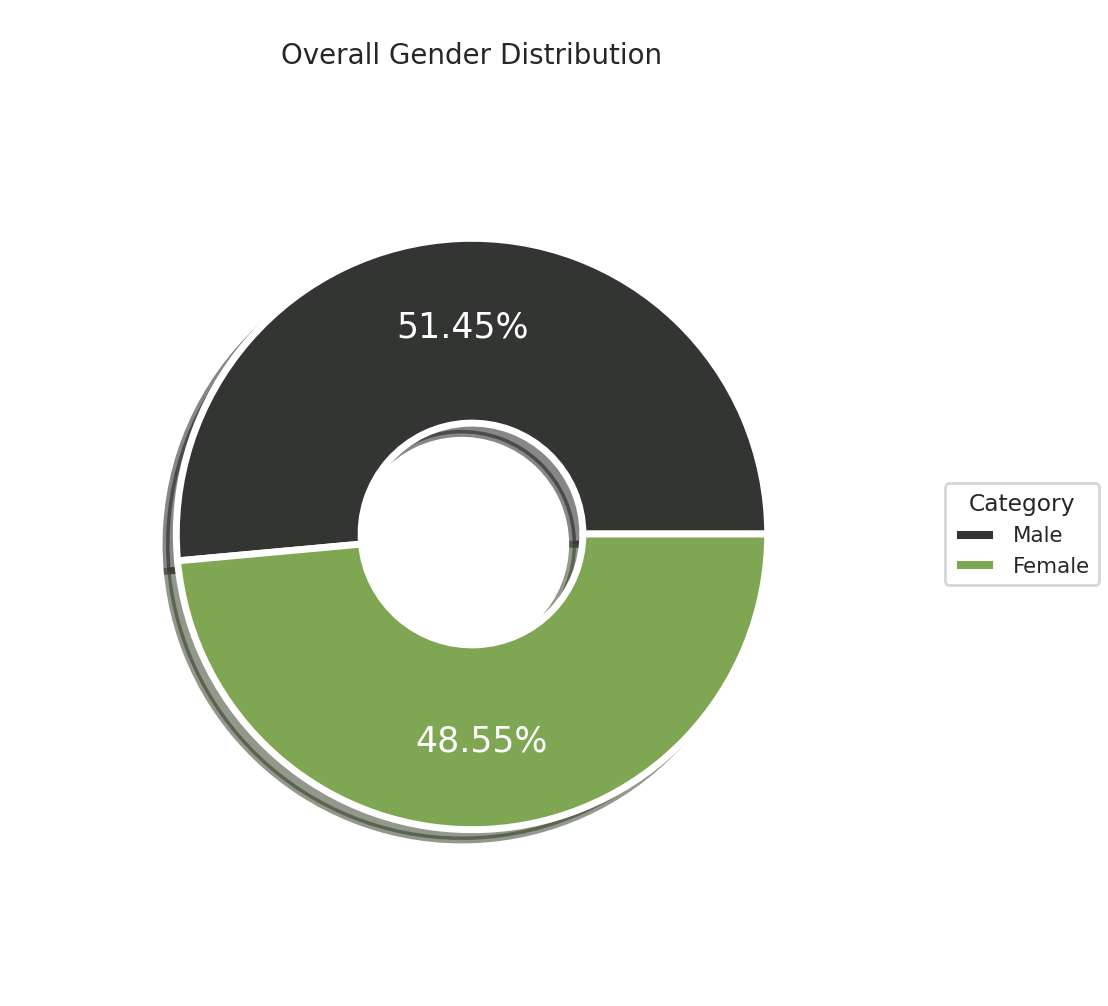

In [ ]:
# prompt: Faça a distribuição de genero para a base de dados como um todo, usando o grafico feito anteriormente como referencia

plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([len(data_temp[data_temp["GENDER"]=="Male"]["GENDER"]),
                                    len(data_temp[data_temp["GENDER"]=="Female"]["GENDER"])],
                                    explode = (0,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.7,
                                    radius=.8,
                                    colors = ["#333533","#7fa653"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white",
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nOverall Gender Distribution",fontsize=20)
plt.show()

### Razões para casos positivos em termos de gênero

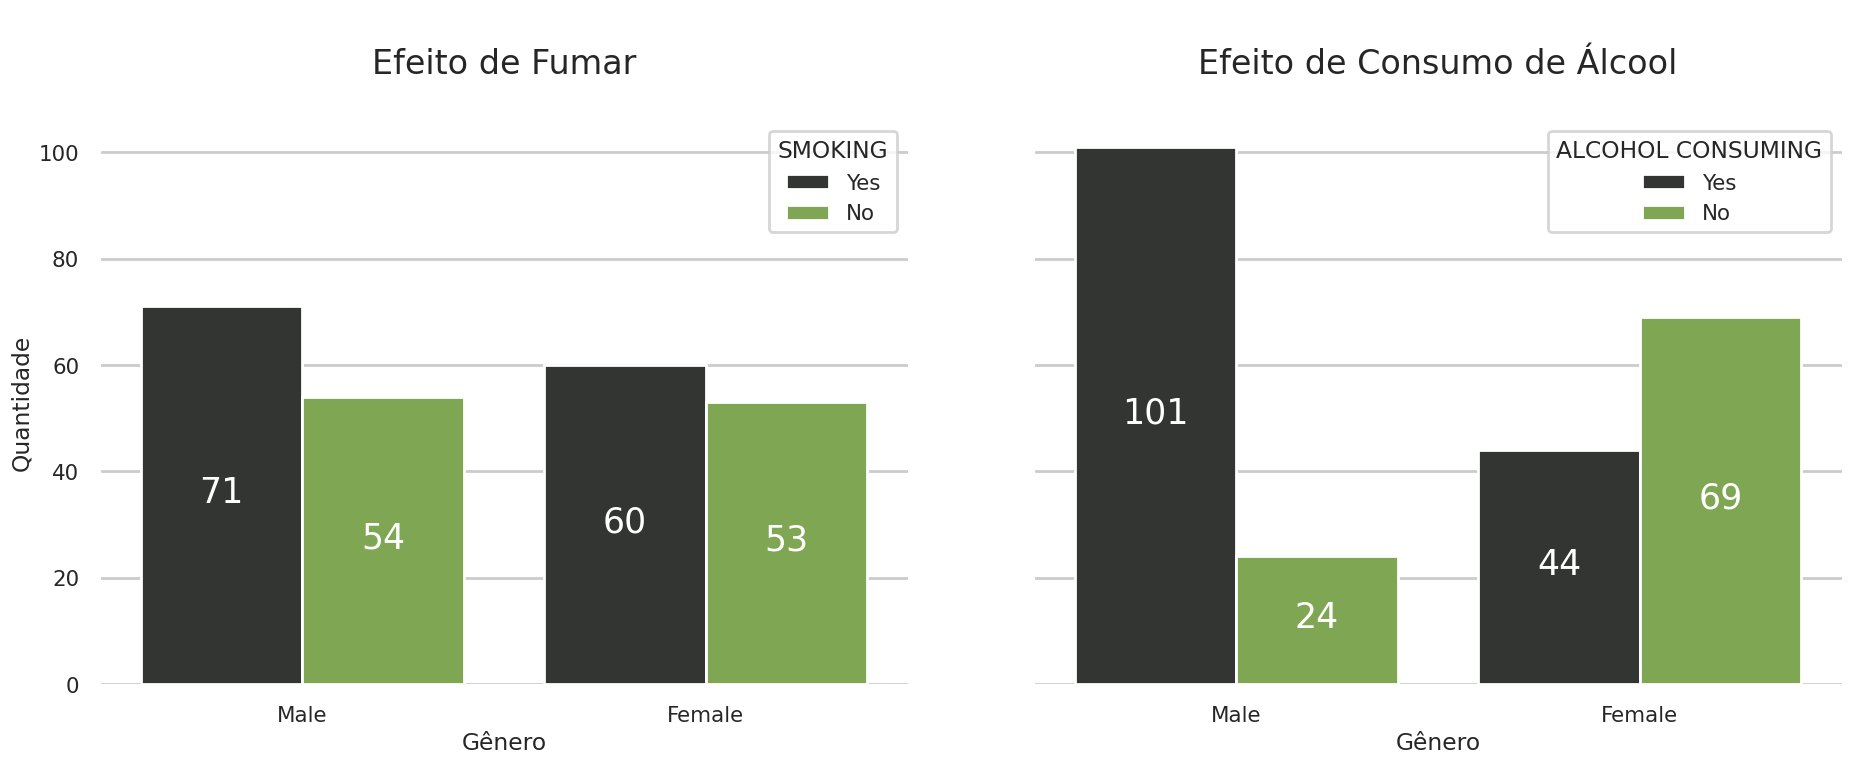

In [ ]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SMOKING",hue_order=["Yes","No"],ax=axs[0],palette=["#333533","#7fa653"],saturation=1)
axs[0].set_title("\nEfeito de Fumar\n",fontsize=24)
axs[0].set_xlabel("Gênero")
axs[0].set_ylabel("Quantidade")
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="ALCOHOL CONSUMING",hue_order=["Yes","No"],ax=axs[1],palette=["#333533","#7fa653"],saturation=1)
axs[1].set_title("\nEfeito de Consumo de Álcool\n",fontsize=24)
axs[1].set_xlabel("Gênero")
axs[1].set_ylabel("Quantidade")
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

### Sintomas para casos positivos em termos de gênero

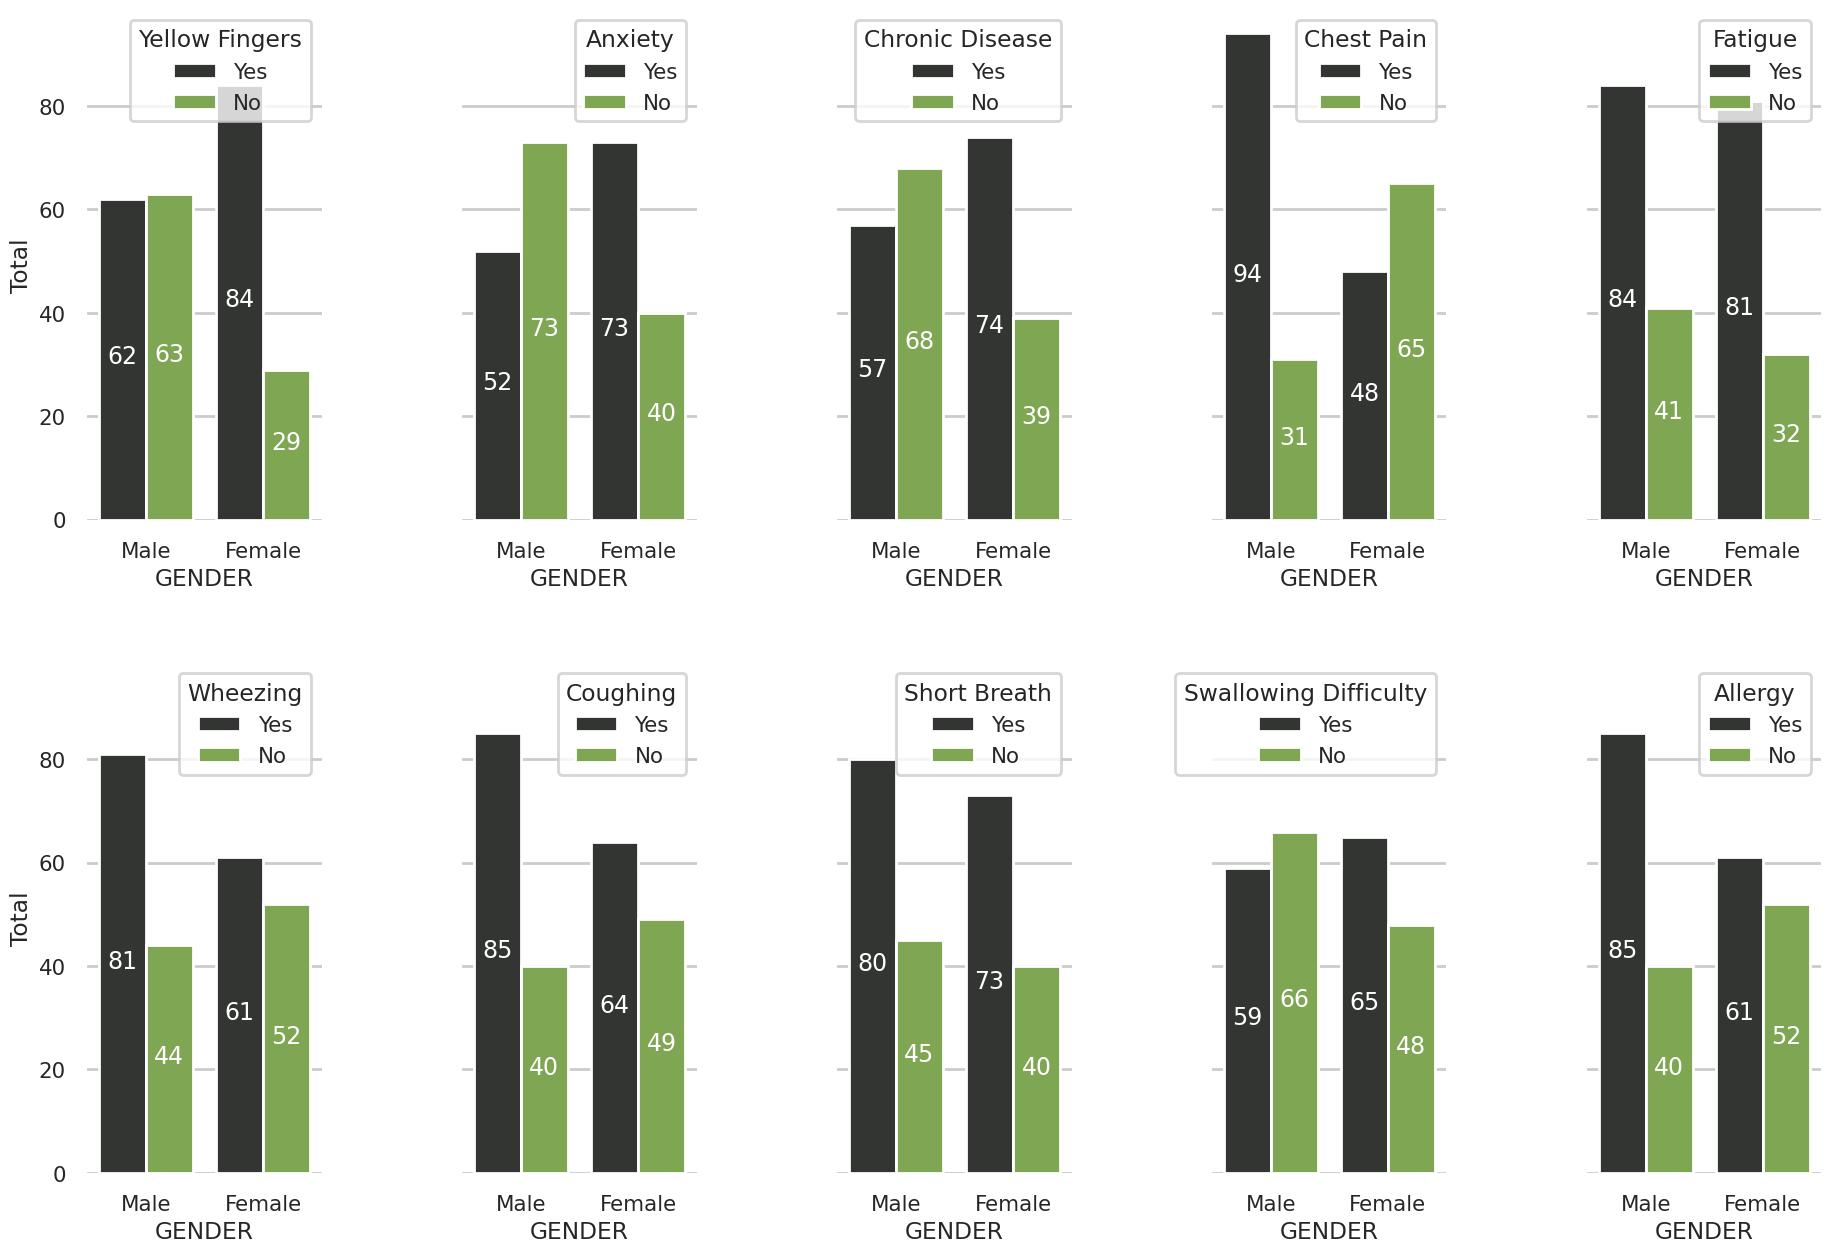

In [ ]:
_, axs = plt.subplots(2,5,figsize=(20,14),sharex=False,sharey=True)
plt.tight_layout(pad=4.0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="YELLOW_FINGERS",hue_order=["Yes","No"],ax=axs[0,0],palette=["#333533","#7FA653"],saturation=1)
axs[0,0].set_ylabel("Total")
axs[0,0].legend(title="Yellow Fingers",loc="upper right")
for container in axs[0,0].containers:
    axs[0,0].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="ANXIETY",hue_order=["Yes","No"],ax=axs[0,1],palette=["#333533","#7FA653"],saturation=1)
axs[0,1].set_ylabel("Total")
axs[0,1].legend(title="Anxiety",loc="upper right")
for container in axs[0,1].containers:
    axs[0,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="CHRONIC DISEASE",hue_order=["Yes","No"],ax=axs[0,2],palette=["#333533","#7FA653"],saturation=1)
axs[0,2].set_ylabel("Total")
axs[0,2].legend(title="Chronic Disease",loc="upper right")
for container in axs[0,2].containers:
    axs[0,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="CHEST PAIN",hue_order=["Yes","No"],ax=axs[0,3],palette=["#333533","#7FA653"],saturation=1)
axs[0,3].set_ylabel("Total")
axs[0,3].legend(title="Chest Pain",loc="upper right")
for container in axs[0,3].containers:
    axs[0,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="FATIGUE ",hue_order=["Yes","No"],ax=axs[0,4],palette=["#333533","#7FA653"],saturation=1)
axs[0,4].set_ylabel("Total")
axs[0,4].legend(title="Fatigue",loc="upper right")
for container in axs[0,4].containers:
    axs[0,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="WHEEZING",hue_order=["Yes","No"],ax=axs[1,0],palette=["#333533","#7FA653"],saturation=1)
axs[1,0].set_ylabel("Total")
axs[1,0].legend(title="Wheezing",loc="upper right")
for container in axs[1,0].containers:
    axs[1,0].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="COUGHING",hue_order=["Yes","No"],ax=axs[1,1],palette=["#333533","#7FA653"],saturation=1)
axs[1,1].set_ylabel("Total")
axs[1,1].legend(title="Coughing",loc="upper right")
for container in axs[1,1].containers:
    axs[1,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SHORTNESS OF BREATH",hue_order=["Yes","No"],ax=axs[1,2],palette=["#333533","#7FA653"],saturation=1)
axs[1,2].set_ylabel("Total")
axs[1,2].legend(title="Short Breath",loc="upper right")
for container in axs[1,2].containers:
    axs[1,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SWALLOWING DIFFICULTY",hue_order=["Yes","No"],ax=axs[1,3],palette=["#333533","#7FA653"],saturation=1)
axs[1,3].set_ylabel("Total")
axs[1,3].legend(title="Swallowing Difficulty",loc="upper right")
for container in axs[1,3].containers:
    axs[1,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="ALLERGY ",hue_order=["Yes","No"],ax=axs[1,4],palette=["#333533","#7FA653"],saturation=1)
axs[1,4].set_ylabel("Total")
axs[1,4].legend(title="Allergy",loc="upper right")
for container in axs[1,4].containers:
    axs[1,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

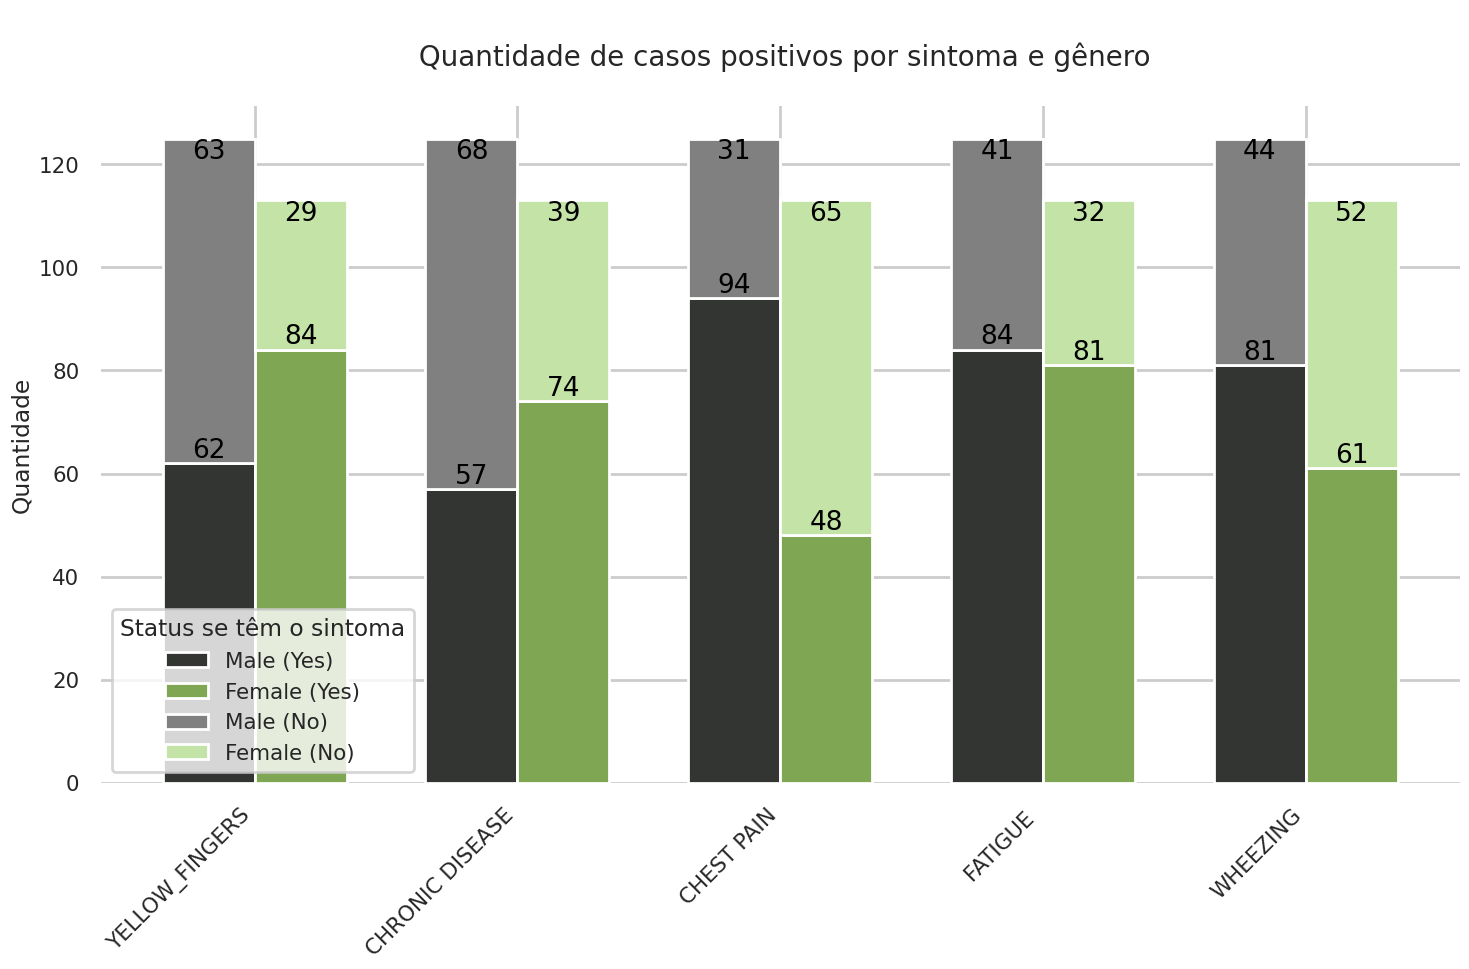

In [ ]:
# prompt: Pegue o código feito anteriormente e coloque um número dentro de cada coluna do gráfico, representando a quantidade de caso positivo e negatico para homem e mulher

# Lista de sintomas para plotar
symptoms = [
    "YELLOW_FINGERS",
    "CHRONIC DISEASE",
    "CHEST PAIN",
    "FATIGUE ",
    "WHEEZING"
]

# Crie uma figura e eixos para o gráfico
fig, ax = plt.subplots(figsize=(15, 10))

# Largura das barras
bar_width = 0.35

# Posições das barras no eixo x
x_pos_male = np.arange(len(symptoms))
x_pos_female = x_pos_male + bar_width

# Iterar sobre os sintomas e plotar as barras para cada gênero
for i, symptom in enumerate(symptoms):
    male_yes = data_temp_pos[(data_temp_pos["GENDER"] == "Male") & (data_temp_pos[symptom] == "Yes")].shape[0]
    male_no = data_temp_pos[(data_temp_pos["GENDER"] == "Male") & (data_temp_pos[symptom] == "No")].shape[0]
    female_yes = data_temp_pos[(data_temp_pos["GENDER"] == "Female") & (data_temp_pos[symptom] == "Yes")].shape[0]
    female_no = data_temp_pos[(data_temp_pos["GENDER"] == "Female") & (data_temp_pos[symptom] == "No")].shape[0]

    # Plotar barras para "Yes" (total de casos positivos para o sintoma)
    bar1 = ax.bar(x_pos_male[i], male_yes, bar_width, label='Male (Yes)' if i == 0 else "", color="#333533")
    bar2 = ax.bar(x_pos_female[i], female_yes, bar_width, label='Female (Yes)' if i == 0 else "", color="#7FA653")

    # Plotar barras para "No" (total de casos negativos para o sintoma)
    bar3 = ax.bar(x_pos_male[i], male_no, bar_width, bottom=male_yes, label='Male (No)' if i == 0 else "", color="#808080")
    bar4 = ax.bar(x_pos_female[i], female_no, bar_width, bottom=female_yes, label='Female (No)' if i == 0 else "", color="#c4e3a6")

    # Adicionar rótulos de texto para as barras "Yes"
    for rect in bar1 + bar2:
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width()/2., height,
                    '%d' % int(height),
                    ha='center', va='bottom', color='black', fontsize=19)

    # Adicionar rótulos de texto para as barras "No"
    for rect in bar3 + bar4:
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width()/2., rect.get_y() + height,
                    '%d' % int(height),
                    ha='center', va='top', color='black', fontsize=19)


# Configurar rótulos, título e legendas
ax.set_ylabel("Quantidade")
ax.set_title("\n Quantidade de casos positivos por sintoma e gênero\n", fontsize=20)
ax.set_xticks(x_pos_male + bar_width / 2)
ax.set_xticklabels(symptoms, rotation=45, ha="right")
ax.legend(title="Status se têm o sintoma")

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


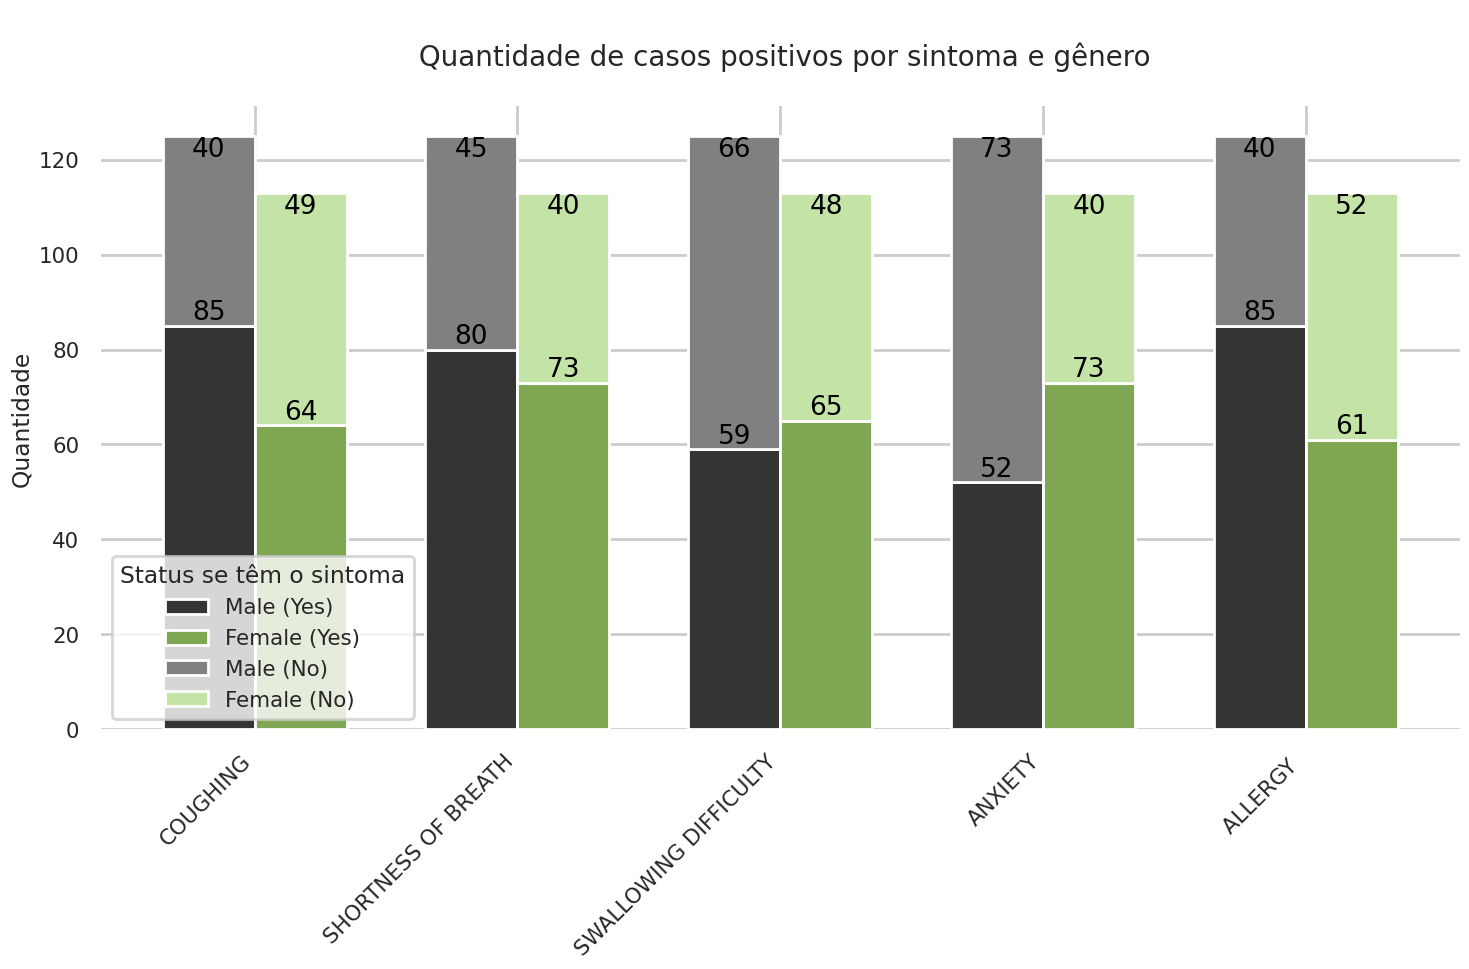

In [ ]:
# prompt: Pegue o código feito anteriormente e coloque um número dentro de cada coluna do gráfico, representando a quantidade de caso positivo e negatico para homem e mulher

# Lista de sintomas para plotar
symptoms = [
    "COUGHING",
    "SHORTNESS OF BREATH",
    "SWALLOWING DIFFICULTY",
    "ANXIETY",
    "ALLERGY ",
]

# Crie uma figura e eixos para o gráfico
fig, ax = plt.subplots(figsize=(15, 10))

# Largura das barras
bar_width = 0.35

# Posições das barras no eixo x
x_pos_male = np.arange(len(symptoms))
x_pos_female = x_pos_male + bar_width

# Iterar sobre os sintomas e plotar as barras para cada gênero
for i, symptom in enumerate(symptoms):
    male_yes = data_temp_pos[(data_temp_pos["GENDER"] == "Male") & (data_temp_pos[symptom] == "Yes")].shape[0]
    male_no = data_temp_pos[(data_temp_pos["GENDER"] == "Male") & (data_temp_pos[symptom] == "No")].shape[0]
    female_yes = data_temp_pos[(data_temp_pos["GENDER"] == "Female") & (data_temp_pos[symptom] == "Yes")].shape[0]
    female_no = data_temp_pos[(data_temp_pos["GENDER"] == "Female") & (data_temp_pos[symptom] == "No")].shape[0]

    # Plotar barras para "Yes" (total de casos positivos para o sintoma)
    bar1 = ax.bar(x_pos_male[i], male_yes, bar_width, label='Male (Yes)' if i == 0 else "", color="#333533")
    bar2 = ax.bar(x_pos_female[i], female_yes, bar_width, label='Female (Yes)' if i == 0 else "", color="#7FA653")

    # Plotar barras para "No" (total de casos negativos para o sintoma)
    bar3 = ax.bar(x_pos_male[i], male_no, bar_width, bottom=male_yes, label='Male (No)' if i == 0 else "", color="#808080")
    bar4 = ax.bar(x_pos_female[i], female_no, bar_width, bottom=female_yes, label='Female (No)' if i == 0 else "", color="#c4e3a6")

    # Adicionar rótulos de texto para as barras "Yes"
    for rect in bar1 + bar2:
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width()/2., height,
                    '%d' % int(height),
                    ha='center', va='bottom', color='black', fontsize=19)

    # Adicionar rótulos de texto para as barras "No"
    for rect in bar3 + bar4:
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width()/2., rect.get_y() + height,
                    '%d' % int(height),
                    ha='center', va='top', color='black', fontsize=19)


# Configurar rótulos, título e legendas
ax.set_ylabel("Quantidade")
ax.set_title("\n Quantidade de casos positivos por sintoma e gênero\n", fontsize=20)
ax.set_xticks(x_pos_male + bar_width / 2)
ax.set_xticklabels(symptoms, rotation=45, ha="right")
ax.legend(title="Status se têm o sintoma")

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

data["GENDER"] = data["GENDER"].replace({"M" : "Male" , "F" : "Female"})
data["LUNG_CANCER"] = LabelEncoder.fit_transform(data["LUNG_CANCER"])

data = pd.get_dummies(data, columns= ["GENDER"])
data.rename(columns={"GENDER_Male" : "MALE", "GENDER_Female" : "FEMALE", "YELLOW_FINGERS" : "YELLOW FINGERS", "PEER_PRESSURE" : "PEER PRESSURE", "LUNG_CANCER" : "LUNG CANCER", "FATIGUE " : "FATIGUE", "ALLERGY " : "ALLERGY"}, inplace=True)
data = data[["AGE","MALE","FEMALE","ALCOHOL CONSUMING","CHEST PAIN","SHORTNESS OF BREATH","COUGHING","PEER PRESSURE","CHRONIC DISEASE","SWALLOWING DIFFICULTY","YELLOW FINGERS","ANXIETY","FATIGUE","ALLERGY","WHEEZING","LUNG CANCER"]]
data.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,AGE,MALE,FEMALE,ALCOHOL CONSUMING,CHEST PAIN,SHORTNESS OF BREATH,COUGHING,PEER PRESSURE,CHRONIC DISEASE,SWALLOWING DIFFICULTY,YELLOW FINGERS,ANXIETY,FATIGUE,ALLERGY,WHEEZING,LUNG CANCER
0,69,True,False,2,2,2,2,1,1,2,2,2,2,1,2,1
1,74,True,False,1,2,2,1,1,2,2,1,1,2,2,1,1
2,59,False,True,1,2,2,2,2,1,1,1,1,2,1,2,0
3,63,True,False,2,2,1,1,1,1,2,2,2,1,1,1,0
4,63,False,True,1,1,2,2,1,1,1,2,1,1,1,2,0


### Pré-processamento para classificação

Nessa parte será necessário fazer um balanceamento

- Usar o SMOTE na base de treino, geralmente na parte dos 70% do treino nós aplicamos o smooth
- Dentro do 70/30, forçar o balanceamento na base dos 70. Talvez não funcione
- Passar o parâmetro de balanceamento dentro de cada modelo

In [ ]:
from imblearn.over_sampling import SMOTE
x = data.drop("LUNG CANCER", axis = 1)
y = data["LUNG CANCER"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")
print(f"_________________________________________________")
print(f"Shape após SMOTE: {x_train_resampled.shape}, {y_train_resampled.shape}")
print(f"Distribuição após SMOTE:\n{y_train_resampled.value_counts()}")


Shape of training data : (193, 15), (193,)
Shape of testing data : (83, 15), (83,)
_________________________________________________
Shape após SMOTE: (336, 15), (336,)
Distribuição após SMOTE:
LUNG CANCER
1    168
0    168
Name: count, dtype: int64


In [ ]:
# prompt: Separe a base de dados em genero masculino e feminino

# Filtrar os dados para separar por gênero
data_male = data[data['MALE'] == 1].copy()
data_female = data[data['FEMALE'] == 1].copy()

print("\nShape dos dados masculinos:", data_male.shape)
print("Shape dos dados femininos:", data_female.shape)


Shape dos dados masculinos: (142, 16)
Shape dos dados femininos: (134, 16)


In [ ]:
# prompt: Usando a base de dados masculinos, faça o pré-processamento dos dados usando o SMOTE como foi feito anteriormente no código

# Pré-processamento dos dados masculinos com SMOTE

# Separar features (X) e target (y) para os dados masculinos
x_male = data_male.drop("LUNG CANCER", axis = 1)
y_male = data_male["LUNG CANCER"]

# Escalar as features dos dados masculinos
scaler_male = StandardScaler()
x_male_scaled = scaler_male.fit_transform(x_male)

# Dividir os dados masculinos em treino e teste
x_male_train, x_male_test, y_male_train, y_male_test = train_test_split(x_male_scaled, y_male, test_size=0.3, random_state=42)

# Aplicar SMOTE apenas nos dados de treino masculinos
smote_male = SMOTE(random_state=42)
x_male_train_resampled, y_male_train_resampled = smote_male.fit_resample(x_male_train, y_male_train)

print("\n--- Pré-processamento para Dados Masculinos ---")
print(f"Shape dos dados de treino masculinos originais: {x_male_train.shape}, {y_male_train.shape}")
print(f"Shape dos dados de teste masculinos: {x_male_test.shape}, {y_male_test.shape}")
print(f"____________________________________________________________________________________")
print(f"Shape dos dados de treino masculinos após SMOTE: {x_male_train_resampled.shape}, {y_male_train_resampled.shape}")
print(f"Distribuição do target nos dados de treino masculinos após SMOTE:\n{y_male_train_resampled.value_counts()}")




--- Pré-processamento para Dados Masculinos ---
Shape dos dados de treino masculinos originais: (99, 15), (99,)
Shape dos dados de teste masculinos: (43, 15), (43,)
____________________________________________________________________________________
Shape dos dados de treino masculinos após SMOTE: (174, 15), (174,)
Distribuição do target nos dados de treino masculinos após SMOTE:
LUNG CANCER
1    87
0    87
Name: count, dtype: int64


In [ ]:
# prompt: Usando a base de dados feminino, faça o pré-processamento dos dados usando o SMOTE como foi feito anteriormente no código

# Pré-processamento dos dados femininos com SMOTE

# Separar features (X) e target (y) para os dados femininos
x_female = data_female.drop("LUNG CANCER", axis = 1)
y_female = data_female["LUNG CANCER"]

# Escalar as features dos dados femininos
scaler_female = StandardScaler()
x_female_scaled = scaler_female.fit_transform(x_female)

# Dividir os dados femininos em treino e teste
x_female_train, x_female_test, y_female_train, y_female_test = train_test_split(x_female_scaled, y_female, test_size=0.3, random_state=42)

# Aplicar SMOTE apenas nos dados de treino femininos
smote_female = SMOTE(random_state=42)
x_female_train_resampled, y_female_train_resampled = smote_female.fit_resample(x_female_train, y_female_train)

print("\n--- Pré-processamento para Dados Femininos ---")
print(f"Shape dos dados de treino femininos originais: {x_female_train.shape}, {y_female_train.shape}")
print(f"Shape dos dados de teste femininos: {x_female_test.shape}, {y_female_test.shape}")
print(f"____________________________________________________________________________________")
print(f"Shape dos dados de treino femininos após SMOTE: {x_female_train_resampled.shape}, {y_female_train_resampled.shape}")
print(f"Distribuição do target nos dados de treino femininos após SMOTE:\n{y_female_train_resampled.value_counts()}")



--- Pré-processamento para Dados Femininos ---
Shape dos dados de treino femininos originais: (93, 15), (93,)
Shape dos dados de teste femininos: (41, 15), (41,)
____________________________________________________________________________________
Shape dos dados de treino femininos após SMOTE: (166, 15), (166,)
Distribuição do target nos dados de treino femininos após SMOTE:
LUNG CANCER
1    83
0    83
Name: count, dtype: int64


# Construção de modelos

## Modelo de Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


lr = LogisticRegression()
lr.fit(x_train_resampled, y_train_resampled)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

precision = precision_score(y_test, lr_pred)
recall = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix : 

[[11  2]
 [ 9 61]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.55      0.85      0.67        13
           1       0.97      0.87      0.92        70

    accuracy                           0.87        83
   macro avg       0.76      0.86      0.79        83
weighted avg       0.90      0.87      0.88        83


The Accuracy of Logistic Regression is 86.75 %
F1 Score: 0.92
Precision: 0.97
Recall: 0.87


In [ ]:
# prompt: Faça o modelo de regressão logística da mesma forma que anteriormente, mas com a base de dados masculina que também foi feita anteriormente

# Modelo de Regressão Logística para Dados Masculinos

lr_male = LogisticRegression()
lr_male.fit(x_male_train_resampled, y_male_train_resampled)
lr_male_pred = lr_male.predict(x_male_test)

lr_male_conf = confusion_matrix(y_male_test, lr_male_pred)
lr_male_report = classification_report(y_male_test, lr_male_pred)
lr_male_acc = round(accuracy_score(y_male_test, lr_male_pred)*100, ndigits = 2)

print(f"\n--- Resultados para Regressão Logística nos Dados Masculinos ---")
print(f"Confusion Matrix : \n\n{lr_male_conf}")
print(f"\nClassification Report : \n\n{lr_male_report}")
print(f"\nThe Accuracy of Logistic Regression for Male Data is {lr_male_acc} %")

precision_male = precision_score(y_male_test, lr_male_pred)
recall_male = recall_score(y_male_test, lr_male_pred)
f1_male = f1_score(y_male_test, lr_male_pred)

print(f"F1 Score (Male Data): {f1_male:.2f}")
print(f"Precision (Male Data): {precision_male:.2f}")
print(f"Recall (Male Data): {recall_male:.2f}")



--- Resultados para Regressão Logística nos Dados Masculinos ---
Confusion Matrix : 

[[ 5  0]
 [ 8 30]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.79      0.88        38

    accuracy                           0.81        43
   macro avg       0.69      0.89      0.72        43
weighted avg       0.93      0.81      0.84        43


The Accuracy of Logistic Regression for Male Data is 81.4 %
F1 Score (Male Data): 0.88
Precision (Male Data): 1.00
Recall (Male Data): 0.79


In [ ]:
# prompt: Faça o modelo de regressão logística da mesma forma que anteriormente, mas com a base de dados feminina que também foi feita anteriormente

# Modelo de Regressão Logística para Dados Femininos

lr_female = LogisticRegression()
lr_female.fit(x_female_train_resampled, y_female_train_resampled)
lr_female_pred = lr_female.predict(x_female_test)

lr_female_conf = confusion_matrix(y_female_test, lr_female_pred)
lr_female_report = classification_report(y_female_test, lr_female_pred)
lr_female_acc = round(accuracy_score(y_female_test, lr_female_pred)*100, ndigits = 2)

print(f"\n--- Resultados para Regressão Logística nos Dados Femininos ---")
print(f"Confusion Matrix : \n\n{lr_female_conf}")
print(f"\nClassification Report : \n\n{lr_female_report}")
print(f"\nThe Accuracy of Logistic Regression for Female Data is {lr_female_acc} %")

precision_female = precision_score(y_female_test, lr_female_pred)
recall_female = recall_score(y_female_test, lr_female_pred)
f1_female = f1_score(y_female_test, lr_female_pred)

print(f"F1 Score (Female Data): {f1_female:.2f}")
print(f"Precision (Female Data): {precision_female:.2f}")
print(f"Recall (Female Data): {recall_female:.2f}")



--- Resultados para Regressão Logística nos Dados Femininos ---
Confusion Matrix : 

[[10  1]
 [ 2 28]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.97      0.93      0.95        30

    accuracy                           0.93        41
   macro avg       0.90      0.92      0.91        41
weighted avg       0.93      0.93      0.93        41


The Accuracy of Logistic Regression for Female Data is 92.68 %
F1 Score (Female Data): 0.95
Precision (Female Data): 0.97
Recall (Female Data): 0.93


## Modelo Naive Bayes Gaussiano

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train_resampled, y_train_resampled)
gnb_pred = gnb.predict(x_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

precision = precision_score(y_test, gnb_pred)
recall = recall_score(y_test, gnb_pred)
f1 = f1_score(y_test, gnb_pred)
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix : 

[[11  2]
 [ 4 66]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.97      0.94      0.96        70

    accuracy                           0.93        83
   macro avg       0.85      0.89      0.87        83
weighted avg       0.93      0.93      0.93        83


The Accuracy of Gaussian Naive Bayes is 92.77 %
F1 Score: 0.96
Precision: 0.97
Recall: 0.94


In [ ]:
# prompt: Faça o modelo de Naive Bayes Gaussiano da mesma forma que anteriormente, mas com a base de dados masculina que também foi feita anteriormente

# Modelo Naive Bayes Gaussiano para Dados Masculinos

gnb_male = GaussianNB()
gnb_male.fit(x_male_train_resampled, y_male_train_resampled)
gnb_male_pred = gnb_male.predict(x_male_test)

gnb_male_conf = confusion_matrix(y_male_test, gnb_male_pred)
gnb_male_report = classification_report(y_male_test, gnb_male_pred)
gnb_male_acc = round(accuracy_score(y_male_test, gnb_male_pred)*100, ndigits = 2)

print(f"\n--- Resultados para Naive Bayes Gaussiano nos Dados Masculinos ---")
print(f"Confusion Matrix : \n\n{gnb_male_conf}")
print(f"\nClassification Report : \n\n{gnb_male_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes for Male Data is {gnb_male_acc} %")

precision_male = precision_score(y_male_test, gnb_male_pred)
recall_male = recall_score(y_male_test, gnb_male_pred)
f1_male = f1_score(y_male_test, gnb_male_pred)

print(f"F1 Score (Male Data): {f1_male:.2f}")
print(f"Precision (Male Data): {precision_male:.2f}")
print(f"Recall (Male Data): {recall_male:.2f}")


--- Resultados para Naive Bayes Gaussiano nos Dados Masculinos ---
Confusion Matrix : 

[[ 5  0]
 [ 3 35]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.92      0.96        38

    accuracy                           0.93        43
   macro avg       0.81      0.96      0.86        43
weighted avg       0.96      0.93      0.94        43


The Accuracy of Gaussian Naive Bayes for Male Data is 93.02 %
F1 Score (Male Data): 0.96
Precision (Male Data): 1.00
Recall (Male Data): 0.92


In [ ]:
# prompt: Faça o modelo de Naive Bayes Gaussiano da mesma forma que anteriormente, mas com a base de dados feminina que também foi feita anteriormente

# Modelo Naive Bayes Gaussiano para Dados Femininos

gnb_female = GaussianNB()
gnb_female.fit(x_female_train_resampled, y_female_train_resampled)
gnb_female_pred = gnb_female.predict(x_female_test)

gnb_female_conf = confusion_matrix(y_female_test, gnb_female_pred)
gnb_female_report = classification_report(y_female_test, gnb_female_pred)
gnb_female_acc = round(accuracy_score(y_female_test, gnb_female_pred)*100, ndigits = 2)

print(f"\n--- Resultados para Naive Bayes Gaussiano nos Dados Femininos ---")
print(f"Confusion Matrix : \n\n{gnb_female_conf}")
print(f"\nClassification Report : \n\n{gnb_female_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes for Female Data is {gnb_female_acc} %")

precision_female = precision_score(y_female_test, gnb_female_pred)
recall_female = recall_score(y_female_test, gnb_female_pred)
f1_female = f1_score(y_female_test, gnb_female_pred)

print(f"F1 Score (Female Data): {f1_female:.2f}")
print(f"Precision (Female Data): {precision_female:.2f}")
print(f"Recall (Female Data): {recall_female:.2f}")


--- Resultados para Naive Bayes Gaussiano nos Dados Femininos ---
Confusion Matrix : 

[[ 8  3]
 [ 5 25]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.89      0.83      0.86        30

    accuracy                           0.80        41
   macro avg       0.75      0.78      0.76        41
weighted avg       0.82      0.80      0.81        41


The Accuracy of Gaussian Naive Bayes for Female Data is 80.49 %
F1 Score (Female Data): 0.86
Precision (Female Data): 0.89
Recall (Female Data): 0.83


## Modelo Naive Bayes de Bernoulli

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(x_train_resampled, y_train_resampled)
bnb_pred = bnb.predict(x_test)
bnb_conf = confusion_matrix(y_test, bnb_pred)
bnb_report = classification_report(y_test, bnb_pred)
bnb_acc = round(accuracy_score(y_test, bnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{bnb_conf}")
print(f"\nClassification Report : \n\n{bnb_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes is {bnb_acc} %")

precision = precision_score(y_test, bnb_pred)
recall = recall_score(y_test, bnb_pred)
f1 = f1_score(y_test, bnb_pred)
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix : 

[[12  1]
 [ 7 63]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.98      0.90      0.94        70

    accuracy                           0.90        83
   macro avg       0.81      0.91      0.85        83
weighted avg       0.93      0.90      0.91        83


The Accuracy of Bernoulli Naive Bayes is 90.36 %
F1 Score: 0.94
Precision: 0.98
Recall: 0.90


In [ ]:
# prompt: Faça o modelo de Naive Bayes de Bernoulli da mesma forma que anteriormente, mas com a base de dados masculina que também foi feita anteriormente

# Modelo Naive Bayes de Bernoulli para Dados Masculinos

bnb_male = BernoulliNB()
bnb_male.fit(x_male_train_resampled, y_male_train_resampled)
bnb_male_pred = bnb_male.predict(x_male_test)

bnb_male_conf = confusion_matrix(y_male_test, bnb_male_pred)
bnb_male_report = classification_report(y_male_test, bnb_male_pred)
bnb_male_acc = round(accuracy_score(y_male_test, bnb_male_pred)*100, ndigits = 2)

print(f"\n--- Resultados para Naive Bayes de Bernoulli nos Dados Masculinos ---")
print(f"Confusion Matrix : \n\n{bnb_male_conf}")
print(f"\nClassification Report : \n\n{bnb_male_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes for Male Data is {bnb_male_acc} %")

precision_male = precision_score(y_male_test, bnb_male_pred)
recall_male = recall_score(y_male_test, bnb_male_pred)
f1_male = f1_score(y_male_test, bnb_male_pred)

print(f"F1 Score (Male Data): {f1_male:.2f}")
print(f"Precision (Male Data): {precision_male:.2f}")
print(f"Recall (Male Data): {recall_male:.2f}")


--- Resultados para Naive Bayes de Bernoulli nos Dados Masculinos ---
Confusion Matrix : 

[[ 5  0]
 [ 7 31]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.82      0.90        38

    accuracy                           0.84        43
   macro avg       0.71      0.91      0.74        43
weighted avg       0.93      0.84      0.86        43


The Accuracy of Bernoulli Naive Bayes for Male Data is 83.72 %
F1 Score (Male Data): 0.90
Precision (Male Data): 1.00
Recall (Male Data): 0.82


In [ ]:
# prompt: Faça o modelo de Naive Bayes de Bernoulli da mesma forma que anteriormente, mas com a base de dados feminina que também foi feita anteriormente

# Modelo Naive Bayes de Bernoulli para Dados Femininos

bnb_female = BernoulliNB()
bnb_female.fit(x_female_train_resampled, y_female_train_resampled)
bnb_female_pred = bnb_female.predict(x_female_test)

bnb_female_conf = confusion_matrix(y_female_test, bnb_female_pred)
bnb_female_report = classification_report(y_female_test, bnb_female_pred)
bnb_female_acc = round(accuracy_score(y_female_test, bnb_female_pred)*100, ndigits = 2)

print(f"\n--- Resultados para Naive Bayes de Bernoulli nos Dados Femininos ---")
print(f"Confusion Matrix : \n\n{bnb_female_conf}")
print(f"\nClassification Report : \n\n{bnb_female_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes for Female Data is {bnb_female_acc} %")

precision_female = precision_score(y_female_test, bnb_female_pred)
recall_female = recall_score(y_female_test, bnb_female_pred)
f1_female = f1_score(y_female_test, bnb_female_pred)

print(f"F1 Score (Female Data): {f1_female:.2f}")
print(f"Precision (Female Data): {precision_female:.2f}")
print(f"Recall (Female Data): {recall_female:.2f}")


--- Resultados para Naive Bayes de Bernoulli nos Dados Femininos ---
Confusion Matrix : 

[[ 9  2]
 [ 2 28]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.93      0.93      0.93        30

    accuracy                           0.90        41
   macro avg       0.88      0.88      0.88        41
weighted avg       0.90      0.90      0.90        41


The Accuracy of Bernoulli Naive Bayes for Female Data is 90.24 %
F1 Score (Female Data): 0.93
Precision (Female Data): 0.93
Recall (Female Data): 0.93


## Modelo SVM - Support Vector Machine Model

In [ ]:
from sklearn.svm import SVC

svm = SVC(C = 100, gamma = 0.002)
svm.fit(x_train_resampled, y_train_resampled)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

precision = precision_score(y_test, svm_pred)
recall = recall_score(y_test, svm_pred)
f1 = f1_score(y_test, svm_pred)
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix : 

[[11  2]
 [ 6 64]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.65      0.85      0.73        13
           1       0.97      0.91      0.94        70

    accuracy                           0.90        83
   macro avg       0.81      0.88      0.84        83
weighted avg       0.92      0.90      0.91        83


The Accuracy of Support Vector Machine is 90.36 %
F1 Score: 0.94
Precision: 0.97
Recall: 0.91


In [ ]:
# prompt: Faça o modelo de SVM da mesma forma que anteriormente, mas com a base de dados masculina que também foi feita anteriormente

# Modelo SVM - Support Vector Machine Model para Dados Masculinos

svm_male = SVC(C = 100, gamma = 0.002) # Você pode ajustar estes hiperparâmetros se necessário
svm_male.fit(x_male_train_resampled, y_male_train_resampled)
svm_male_pred = svm_male.predict(x_male_test)

svm_male_conf = confusion_matrix(y_male_test, svm_male_pred)
svm_male_report = classification_report(y_male_test, svm_male_pred)
svm_male_acc = round(accuracy_score(y_male_test, svm_male_pred)*100, ndigits = 2)

print(f"\n--- Resultados para SVM nos Dados Masculinos ---")
print(f"Confusion Matrix : \n\n{svm_male_conf}")
print(f"\nClassification Report : \n\n{svm_male_report}")
print(f"\nThe Accuracy of Support Vector Machine for Male Data is {svm_male_acc} %")

precision_male = precision_score(y_male_test, svm_male_pred)
recall_male = recall_score(y_male_test, svm_male_pred)
f1_male = f1_score(y_male_test, svm_male_pred)

print(f"F1 Score (Male Data): {f1_male:.2f}")
print(f"Precision (Male Data): {precision_male:.2f}")
print(f"Recall (Male Data): {recall_male:.2f}")


--- Resultados para SVM nos Dados Masculinos ---
Confusion Matrix : 

[[ 5  0]
 [ 7 31]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.82      0.90        38

    accuracy                           0.84        43
   macro avg       0.71      0.91      0.74        43
weighted avg       0.93      0.84      0.86        43


The Accuracy of Support Vector Machine for Male Data is 83.72 %
F1 Score (Male Data): 0.90
Precision (Male Data): 1.00
Recall (Male Data): 0.82


In [ ]:
# prompt: Faça o modelo de SVM da mesma forma que anteriormente, mas com a base de dados feminina que também foi feita anteriormente

# Modelo SVM - Support Vector Machine Model para Dados Femininos

svm_female = SVC(C = 100, gamma = 0.002) # Você pode ajustar estes hiperparâmetros se necessário
svm_female.fit(x_female_train_resampled, y_female_train_resampled)
svm_female_pred = svm_female.predict(x_female_test)

svm_female_conf = confusion_matrix(y_female_test, svm_female_pred)
svm_female_report = classification_report(y_female_test, svm_female_pred)
svm_female_acc = round(accuracy_score(y_female_test, svm_female_pred)*100, ndigits = 2)

print(f"\n--- Resultados para SVM nos Dados Femininos ---")
print(f"Confusion Matrix : \n\n{svm_female_conf}")
print(f"\nClassification Report : \n\n{svm_female_report}")
print(f"\nThe Accuracy of Support Vector Machine for Female Data is {svm_female_acc} %")

precision_female = precision_score(y_female_test, svm_female_pred)
recall_female = recall_score(y_female_test, svm_female_pred)
f1_female = f1_score(y_female_test, svm_female_pred)

print(f"F1 Score (Female Data): {f1_female:.2f}")
print(f"Precision (Female Data): {precision_female:.2f}")
print(f"Recall (Female Data): {recall_female:.2f}")


--- Resultados para SVM nos Dados Femininos ---
Confusion Matrix : 

[[ 9  2]
 [ 2 28]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.93      0.93      0.93        30

    accuracy                           0.90        41
   macro avg       0.88      0.88      0.88        41
weighted avg       0.90      0.90      0.90        41


The Accuracy of Support Vector Machine for Female Data is 90.24 %
F1 Score (Female Data): 0.93
Precision (Female Data): 0.93
Recall (Female Data): 0.93


## Modelo de Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfg = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfg.fit(x_train_resampled, y_train_resampled)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

precision = precision_score(y_test, rfg_pred)
recall = recall_score(y_test, rfg_pred)
f1 = f1_score(y_test, rfg_pred)
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix : 

[[ 7  6]
 [ 0 70]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.92      1.00      0.96        70

    accuracy                           0.93        83
   macro avg       0.96      0.77      0.83        83
weighted avg       0.93      0.93      0.92        83


The Accuracy of Random Forest Classifier is 92.77 %
F1 Score: 0.96
Precision: 0.92
Recall: 1.00


In [ ]:
# prompt: Faça o modelo de Random Forest da mesma forma que anteriormente, mas com a base de dados masculina que também foi feita anteriormente

# Modelo de Random Forest para Dados Masculinos

rfg_male = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfg_male.fit(x_male_train_resampled, y_male_train_resampled)
rfg_male_pred = rfg_male.predict(x_male_test)

rfg_male_conf = confusion_matrix(y_male_test, rfg_male_pred)
rfg_male_report = classification_report(y_male_test, rfg_male_pred)
rfg_male_acc = round(accuracy_score(y_male_test, rfg_male_pred)*100, ndigits = 2)

print(f"\n--- Resultados para Random Forest nos Dados Masculinos ---")
print(f"Confusion Matrix : \n\n{rfg_male_conf}")
print(f"\nClassification Report : \n\n{rfg_male_report}")
print(f"\nThe Accuracy of Random Forest Classifier for Male Data is {rfg_male_acc} %")

precision_male = precision_score(y_male_test, rfg_male_pred)
recall_male = recall_score(y_male_test, rfg_male_pred)
f1_male = f1_score(y_male_test, rfg_male_pred)

print(f"F1 Score (Male Data): {f1_male:.2f}")
print(f"Precision (Male Data): {precision_male:.2f}")
print(f"Recall (Male Data): {recall_male:.2f}")



--- Resultados para Random Forest nos Dados Masculinos ---
Confusion Matrix : 

[[ 4  1]
 [ 3 35]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.97      0.92      0.95        38

    accuracy                           0.91        43
   macro avg       0.77      0.86      0.81        43
weighted avg       0.93      0.91      0.91        43


The Accuracy of Random Forest Classifier for Male Data is 90.7 %
F1 Score (Male Data): 0.95
Precision (Male Data): 0.97
Recall (Male Data): 0.92


In [ ]:
# prompt: Faça o modelo de Random Forest da mesma forma que anteriormente, mas com a base de dados feminina que também foi feita anteriormente

# Modelo de Random Forest para Dados Femininos

rfg_female = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfg_female.fit(x_female_train_resampled, y_female_train_resampled)
rfg_female_pred = rfg_female.predict(x_female_test)

rfg_female_conf = confusion_matrix(y_female_test, rfg_female_pred)
rfg_female_report = classification_report(y_female_test, rfg_female_pred)
rfg_female_acc = round(accuracy_score(y_female_test, rfg_female_pred)*100, ndigits = 2)

print(f"\n--- Resultados para Random Forest nos Dados Femininos ---")
print(f"Confusion Matrix : \n\n{rfg_female_conf}")
print(f"\nClassification Report : \n\n{rfg_female_report}")
print(f"\nThe Accuracy of Random Forest Classifier for Female Data is {rfg_female_acc} %")

precision_female = precision_score(y_female_test, rfg_female_pred)
recall_female = recall_score(y_female_test, rfg_female_pred)
f1_female = f1_score(y_female_test, rfg_female_pred)

print(f"F1 Score (Female Data): {f1_female:.2f}")
print(f"Precision (Female Data): {precision_female:.2f}")
print(f"Recall (Female Data): {recall_female:.2f}")


--- Resultados para Random Forest nos Dados Femininos ---
Confusion Matrix : 

[[ 6  5]
 [ 2 28]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.75      0.55      0.63        11
           1       0.85      0.93      0.89        30

    accuracy                           0.83        41
   macro avg       0.80      0.74      0.76        41
weighted avg       0.82      0.83      0.82        41


The Accuracy of Random Forest Classifier for Female Data is 82.93 %
F1 Score (Female Data): 0.89
Precision (Female Data): 0.85
Recall (Female Data): 0.93


## Modelo KNN - K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_resampled, y_train_resampled)
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")


precision = precision_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix : 

[[13  0]
 [ 4 66]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.94      0.97        70

    accuracy                           0.95        83
   macro avg       0.88      0.97      0.92        83
weighted avg       0.96      0.95      0.95        83


The Accuracy of K Nearest Neighbors Classifier is 95.18 %
F1 Score: 0.97
Precision: 1.00
Recall: 0.94


In [ ]:
# prompt: Faça o modelo de KNN da mesma forma que anteriormente, mas com a base de dados masculina que também foi feita anteriormente

# Modelo KNN - K Nearest Neighbors para Dados Masculinos

knn_male = KNeighborsClassifier(n_neighbors=2) # Você pode ajustar n_neighbors se necessário
knn_male.fit(x_male_train_resampled, y_male_train_resampled)
knn_male_pred = knn_male.predict(x_male_test)

knn_male_conf = confusion_matrix(y_male_test, knn_male_pred)
knn_male_report = classification_report(y_male_test, knn_male_pred)
knn_male_acc = round(accuracy_score(y_male_test, knn_male_pred)*100, ndigits = 2)

print(f"\n--- Resultados para K Nearest Neighbors nos Dados Masculinos ---")
print(f"Confusion Matrix : \n\n{knn_male_conf}")
print(f"\nClassification Report : \n\n{knn_male_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier for Male Data is {knn_male_acc} %")

precision_male = precision_score(y_male_test, knn_male_pred)
recall_male = recall_score(y_male_test, knn_male_pred)
f1_male = f1_score(y_male_test, knn_male_pred)

print(f"F1 Score (Male Data): {f1_male:.2f}")
print(f"Precision (Male Data): {precision_male:.2f}")
print(f"Recall (Male Data): {recall_male:.2f}")


--- Resultados para K Nearest Neighbors nos Dados Masculinos ---
Confusion Matrix : 

[[ 5  0]
 [ 7 31]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.82      0.90        38

    accuracy                           0.84        43
   macro avg       0.71      0.91      0.74        43
weighted avg       0.93      0.84      0.86        43


The Accuracy of K Nearest Neighbors Classifier for Male Data is 83.72 %
F1 Score (Male Data): 0.90
Precision (Male Data): 1.00
Recall (Male Data): 0.82


In [ ]:
# prompt: Faça o modelo de KNN da mesma forma que anteriormente, mas com a base de dados feminina que também foi feita anteriormente

# Modelo KNN - K Nearest Neighbors para Dados Femininos

knn_female = KNeighborsClassifier(n_neighbors=2) # Você pode ajustar n_neighbors se necessário
knn_female.fit(x_female_train_resampled, y_female_train_resampled)
knn_female_pred = knn_female.predict(x_female_test)

knn_female_conf = confusion_matrix(y_female_test, knn_female_pred)
knn_female_report = classification_report(y_female_test, knn_female_pred)
knn_female_acc = round(accuracy_score(y_female_test, knn_female_pred)*100, ndigits = 2)

print(f"\n--- Resultados para K Nearest Neighbors nos Dados Femininos ---")
print(f"Confusion Matrix : \n\n{knn_female_conf}")
print(f"\nClassification Report : \n\n{knn_female_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier for Female Data is {knn_female_acc} %")

precision_female = precision_score(y_female_test, knn_female_pred)
recall_female = recall_score(y_female_test, knn_female_pred)
f1_female = f1_score(y_female_test, knn_female_pred)

print(f"F1 Score (Female Data): {f1_female:.2f}")
print(f"Precision (Female Data): {precision_female:.2f}")
print(f"Recall (Female Data): {recall_female:.2f}")



--- Resultados para K Nearest Neighbors nos Dados Femininos ---
Confusion Matrix : 

[[10  1]
 [ 2 28]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.97      0.93      0.95        30

    accuracy                           0.93        41
   macro avg       0.90      0.92      0.91        41
weighted avg       0.93      0.93      0.93        41


The Accuracy of K Nearest Neighbors Classifier for Female Data is 92.68 %
F1 Score (Female Data): 0.95
Precision (Female Data): 0.97
Recall (Female Data): 0.93


## Modelo XGBoost - Extreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
#import xgboost as xgb

xgb = XGBClassifier(use_label_encoder = False)
xgb.fit(x_train_resampled, y_train_resampled)
xgb_pred = xgb.predict(x_test)
xgb_conf = confusion_matrix(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)
xgb_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{xgb_conf}")
print(f"\nClassification Report : \n\n{xgb_report}")
print(f"\nThe Accuracy of Extreme Gradient Boosting Classifier is {xgb_acc} %")

precision = precision_score(y_test, xgb_pred)
recall = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix : 

[[ 9  4]
 [ 0 70]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.95      1.00      0.97        70

    accuracy                           0.95        83
   macro avg       0.97      0.85      0.90        83
weighted avg       0.95      0.95      0.95        83


The Accuracy of Extreme Gradient Boosting Classifier is 95.18 %
F1 Score: 0.97
Precision: 0.95
Recall: 1.00


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:45:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# prompt: Faça o modelo de XGBoost da mesma forma que anteriormente, mas com a base de dados masculina que também foi feita anteriormente

# Modelo XGBoost - Extreme Gradient Boosting para Dados Masculinos

# Garantir que use_label_encoder está False para evitar warnings
xgb_male = XGBClassifier(use_label_encoder=False)
xgb_male.fit(x_male_train_resampled, y_male_train_resampled)
xgb_male_pred = xgb_male.predict(x_male_test)

xgb_male_conf = confusion_matrix(y_male_test, xgb_male_pred)
xgb_male_report = classification_report(y_male_test, xgb_male_pred)
xgb_male_acc = round(accuracy_score(y_male_test, xgb_male_pred)*100, ndigits = 2)

print(f"\n--- Resultados para XGBoost nos Dados Masculinos ---")
print(f"Confusion Matrix : \n\n{xgb_male_conf}")
print(f"\nClassification Report : \n\n{xgb_male_report}")
print(f"\nThe Accuracy of Extreme Gradient Boosting Classifier for Male Data is {xgb_male_acc} %")

precision_male = precision_score(y_male_test, xgb_male_pred)
recall_male = recall_score(y_male_test, xgb_male_pred)
f1_male = f1_score(y_male_test, xgb_male_pred)

print(f"F1 Score (Male Data): {f1_male:.2f}")
print(f"Precision (Male Data): {precision_male:.2f}")
print(f"Recall (Male Data): {recall_male:.2f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:58:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Resultados para XGBoost nos Dados Masculinos ---
Confusion Matrix : 

[[ 5  0]
 [ 4 34]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.89      0.94        38

    accuracy                           0.91        43
   macro avg       0.78      0.95      0.83        43
weighted avg       0.95      0.91      0.92        43


The Accuracy of Extreme Gradient Boosting Classifier for Male Data is 90.7 %
F1 Score (Male Data): 0.94
Precision (Male Data): 1.00
Recall (Male Data): 0.89


In [ ]:
# prompt: Faça o modelo de XGBoost da mesma forma que anteriormente, mas com a base de dados feminina que também foi feita anteriormente

# Modelo XGBoost - Extreme Gradient Boosting para Dados Femininos

# Garantir que use_label_encoder está False para evitar warnings
xgb_female = XGBClassifier(use_label_encoder=False)
xgb_female.fit(x_female_train_resampled, y_female_train_resampled)
xgb_female_pred = xgb_female.predict(x_female_test)

xgb_female_conf = confusion_matrix(y_female_test, xgb_female_pred)
xgb_female_report = classification_report(y_female_test, xgb_female_pred)
xgb_female_acc = round(accuracy_score(y_female_test, xgb_female_pred)*100, ndigits = 2)

print(f"\n--- Resultados para XGBoost nos Dados Femininos ---")
print(f"Confusion Matrix : \n\n{xgb_female_conf}")
print(f"\nClassification Report : \n\n{xgb_female_report}")
print(f"\nThe Accuracy of Extreme Gradient Boosting Classifier for Female Data is {xgb_female_acc} %")

precision_female = precision_score(y_female_test, xgb_female_pred)
recall_female = recall_score(y_female_test, xgb_female_pred)
f1_female = f1_score(y_female_test, xgb_female_pred)

print(f"F1 Score (Female Data): {f1_female:.2f}")
print(f"Precision (Female Data): {precision_female:.2f}")
print(f"Recall (Female Data): {recall_female:.2f}")



--- Resultados para XGBoost nos Dados Femininos ---
Confusion Matrix : 

[[ 7  4]
 [ 2 28]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.88      0.93      0.90        30

    accuracy                           0.85        41
   macro avg       0.83      0.78      0.80        41
weighted avg       0.85      0.85      0.85        41


The Accuracy of Extreme Gradient Boosting Classifier for Female Data is 85.37 %
F1 Score (Female Data): 0.90
Precision (Female Data): 0.88
Recall (Female Data): 0.93


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:52:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Cálculo das curvas AUC & ROC

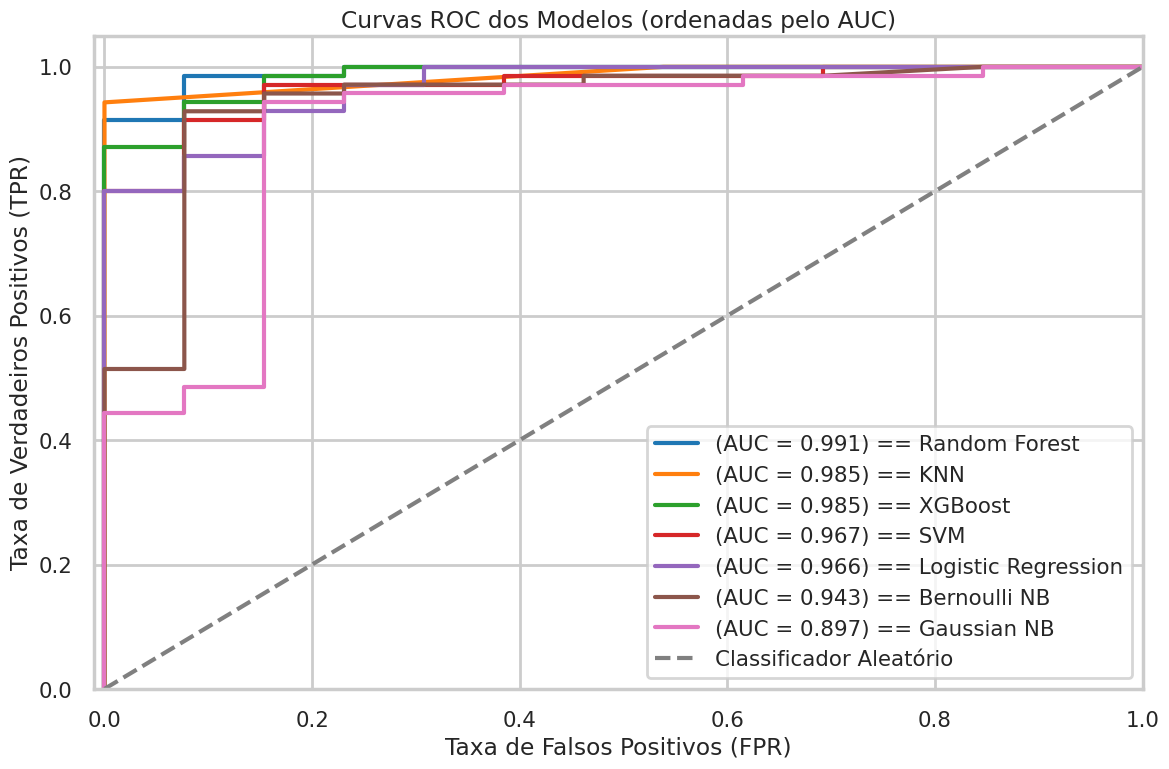

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

lr_pred_proba   = lr.predict_proba(x_test)[:,1]
gnb_pred_proba  = gnb.predict_proba(x_test)[:,1]
bnb_pred_proba  = bnb.predict_proba(x_test)[:,1]
knn_pred_proba  = knn.predict_proba(x_test)[:,1]
rfg_pred_proba  = rfg.predict_proba(x_test)[:,1]
xgb_pred_proba  = xgb.predict_proba(x_test)[:,1]
svm_scores      = svm.decision_function(x_test) # ou .predict_proba se treinou com probability=True

model_probs = {
    'Logistic Regression': lr_pred_proba,
    'Gaussian NB':         gnb_pred_proba,
    'Bernoulli NB':        bnb_pred_proba,
    'KNN':                 knn_pred_proba,
    'Random Forest':       rfg_pred_proba,
    'XGBoost':             xgb_pred_proba,
    'SVM':                 svm_scores
}

roc_auc_results = []

for name, scores in model_probs.items():
    auc = roc_auc_score(y_test, scores)
    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc_results.append((name, auc, fpr, tpr))
    #print(f"{name} == AUC: {auc:.3f}")

roc_auc_results.sort(key=lambda x: x[1], reverse=True)

#auc2 = roc_auc_score(y_test, rfg.predict(x_test))
#auc3 = roc_auc_score(y_test, rfg.predict_proba(x_test)[:,1])
#print(f"")
#print(f"RF 1 = {auc2}")
#print(f"RF 2 = {auc3}")

plt.figure(figsize=(12,8))
colors = plt.cm.tab10.colors
for i, (name, auc, fpr, tpr) in enumerate(roc_auc_results):
    plt.plot(fpr, tpr, label=f'(AUC = {auc:.3f}) == {name}', color=colors[i % len(colors)])
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Classificador Aleatório')
plt.title('Curvas ROC dos Modelos (ordenadas pelo AUC)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.show()

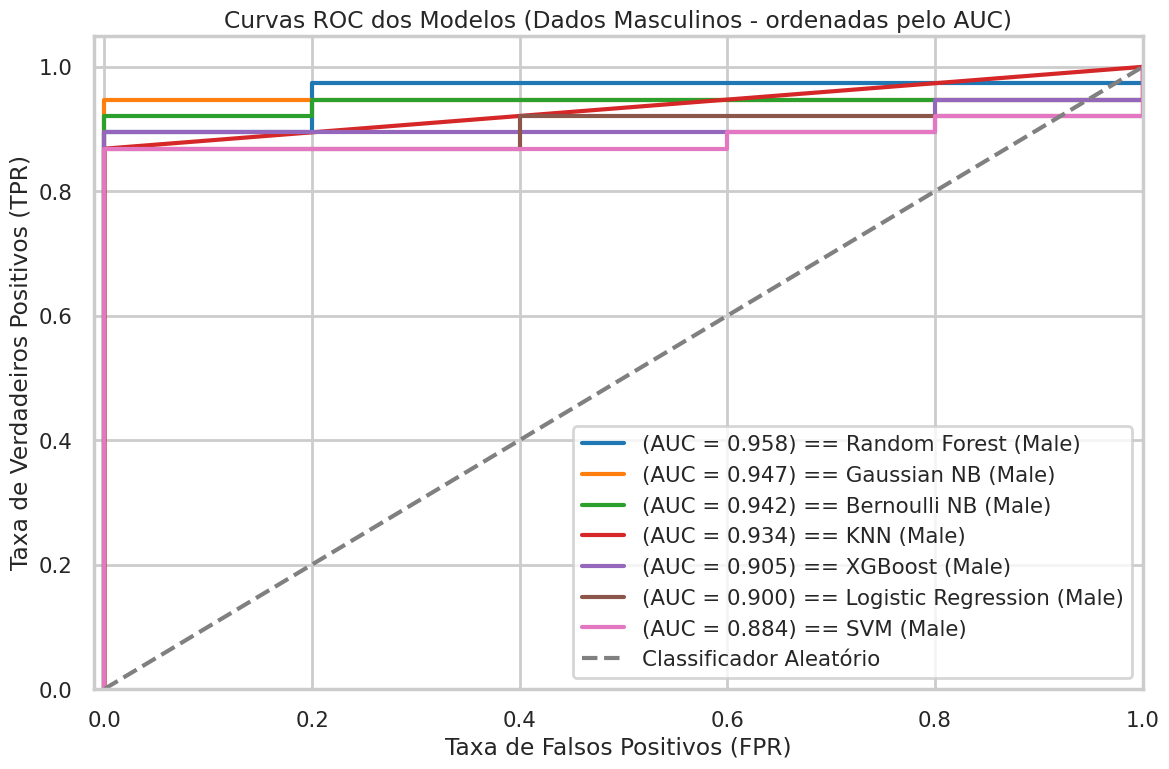

In [ ]:
# prompt: Faça o calculo da curva ROC e do AUC da mesma forma que anteriormente, mas com a base de dados masculina

# Cálculo das curvas AUC & ROC para Dados Masculinos

lr_male_pred_proba   = lr_male.predict_proba(x_male_test)[:,1]
gnb_male_pred_proba  = gnb_male.predict_proba(x_male_test)[:,1]
bnb_male_pred_proba  = bnb_male.predict_proba(x_male_test)[:,1]
knn_male_pred_proba  = knn_male.predict_proba(x_male_test)[:,1]
rfg_male_pred_proba  = rfg_male.predict_proba(x_male_test)[:,1]
xgb_male_pred_proba  = xgb_male.predict_proba(x_male_test)[:,1]
# Para SVM, use decision_function() se predict_proba não estiver disponível (se probability=False)
# ou .predict_proba(x_male_test)[:,1] se probability=True no SVC
svm_male_scores      = svm_male.decision_function(x_male_test)

model_male_probs = {
    'Logistic Regression (Male)': lr_male_pred_proba,
    'Gaussian NB (Male)':         gnb_male_pred_proba,
    'Bernoulli NB (Male)':        bnb_male_pred_proba,
    'KNN (Male)':                 knn_male_pred_proba,
    'Random Forest (Male)':       rfg_male_pred_proba,
    'XGBoost (Male)':             xgb_male_pred_proba,
    'SVM (Male)':                 svm_male_scores
}

roc_auc_male_results = []

for name, scores in model_male_probs.items():
    auc = roc_auc_score(y_male_test, scores)
    fpr, tpr, _ = roc_curve(y_male_test, scores)
    roc_auc_male_results.append((name, auc, fpr, tpr))
    #print(f"{name} == AUC: {auc:.3f}")

roc_auc_male_results.sort(key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12,8))
colors = plt.cm.tab10.colors
for i, (name, auc, fpr, tpr) in enumerate(roc_auc_male_results):
    plt.plot(fpr, tpr, label=f'(AUC = {auc:.3f}) == {name}', color=colors[i % len(colors)])
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Classificador Aleatório')
plt.title('Curvas ROC dos Modelos (Dados Masculinos - ordenadas pelo AUC)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.show()

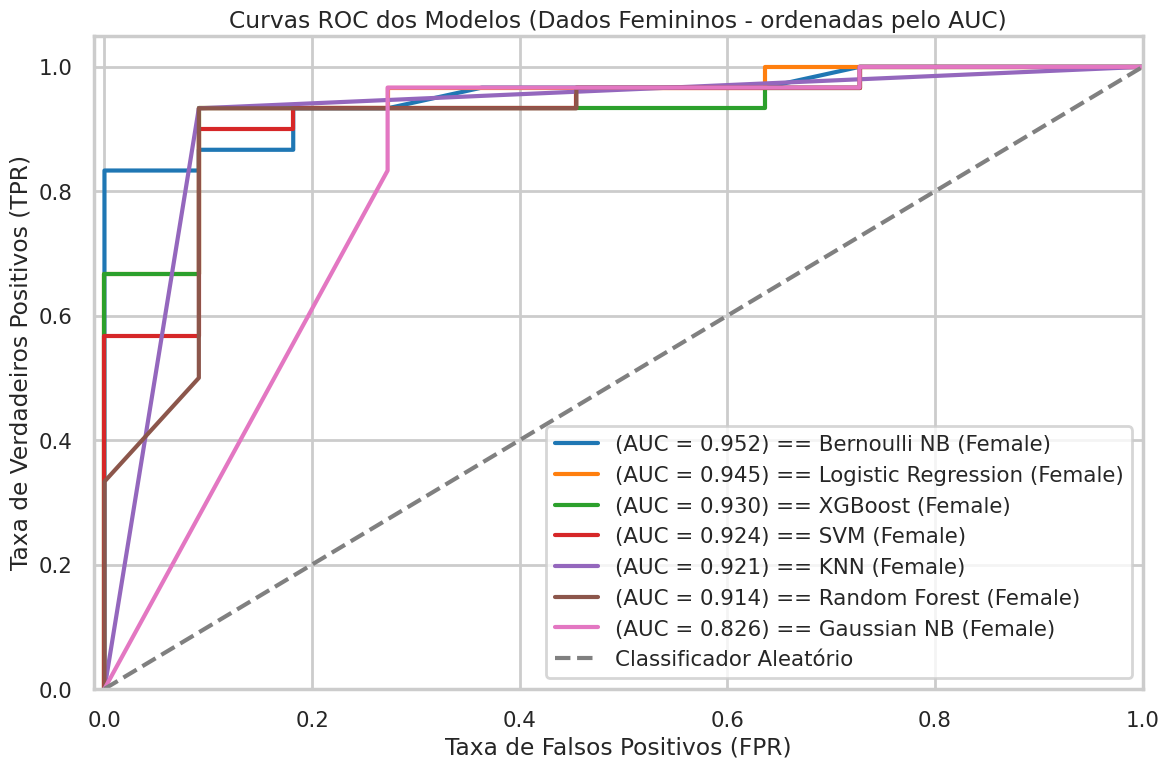

In [ ]:
# Cálculo das curvas AUC & ROC para Dados Femininos

lr_female_pred_proba   = lr_female.predict_proba(x_female_test)[:,1]
gnb_female_pred_proba  = gnb_female.predict_proba(x_female_test)[:,1]
bnb_female_pred_proba  = bnb_female.predict_proba(x_female_test)[:,1]
knn_female_pred_proba  = knn_female.predict_proba(x_female_test)[:,1]
rfg_female_pred_proba  = rfg_female.predict_proba(x_female_test)[:,1]
xgb_female_pred_proba  = xgb_female.predict_proba(x_female_test)[:,1]
# Para SVM, use decision_function() se predict_proba não estiver disponível (se probability=False)
# ou .predict_proba(x_female_test)[:,1] se probability=True no SVC
svm_female_scores      = svm_female.decision_function(x_female_test)

model_female_probs = {
    'Logistic Regression (Female)': lr_female_pred_proba,
    'Gaussian NB (Female)':         gnb_female_pred_proba,
    'Bernoulli NB (Female)':        bnb_female_pred_proba,
    'KNN (Female)':                 knn_female_pred_proba,
    'Random Forest (Female)':       rfg_female_pred_proba,
    'XGBoost (Female)':             xgb_female_pred_proba,
    'SVM (Female)':                 svm_female_scores
}

roc_auc_female_results = []

for name, scores in model_female_probs.items():
    auc = roc_auc_score(y_female_test, scores)
    fpr, tpr, _ = roc_curve(y_female_test, scores)
    roc_auc_female_results.append((name, auc, fpr, tpr))
    #print(f"{name} == AUC: {auc:.3f}")

roc_auc_female_results.sort(key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12,8))
colors = plt.cm.tab10.colors
for i, (name, auc, fpr, tpr) in enumerate(roc_auc_female_results):
    plt.plot(fpr, tpr, label=f'(AUC = {auc:.3f}) == {name}', color=colors[i % len(colors)])
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Classificador Aleatório')
plt.title('Curvas ROC dos Modelos (Dados Femininos - ordenadas pelo AUC)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.show()

## Calculo do F1-Score e seu gráfico

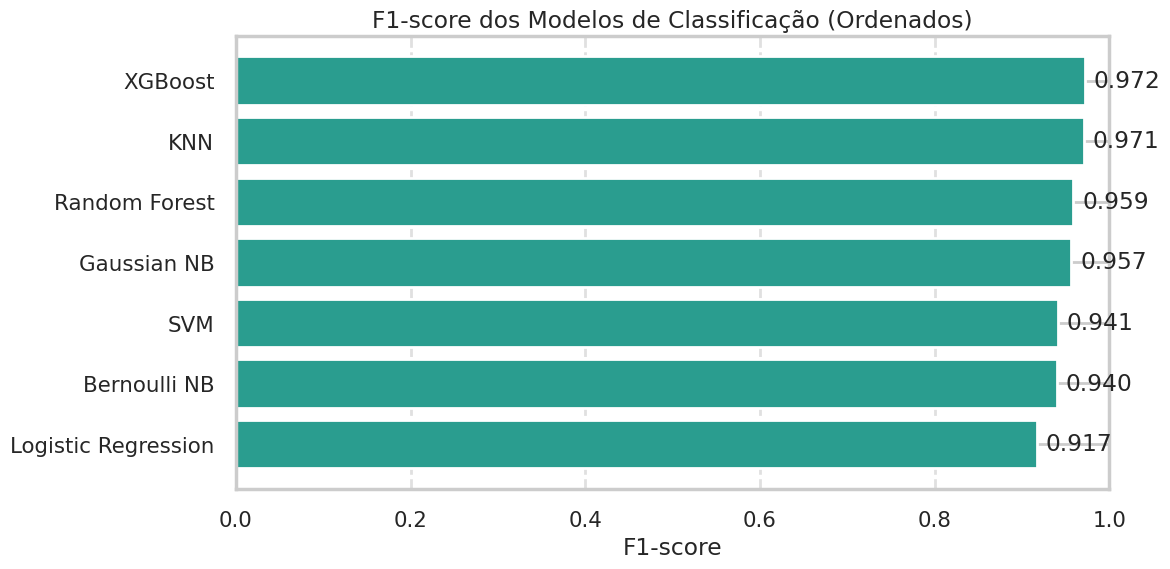

In [ ]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Cálculo dos F1-scores (usando valores binários, não probabilidades!)
f1_scores = {
    "Logistic Regression": f1_score(y_test, lr_pred),
    "Gaussian NB": f1_score(y_test, gnb_pred),
    "Bernoulli NB": f1_score(y_test, bnb_pred),
    "SVM": f1_score(y_test, svm_pred),
    "Random Forest": f1_score(y_test, rfg_pred),
    "KNN": f1_score(y_test, knn_pred),
    "XGBoost": f1_score(y_test, xgb_pred),
}

# Ordenando os modelos pelo F1-score (do maior para o menor)
sorted_f1 = sorted(f1_scores.items(), key=lambda x: x[1], reverse=False)
model_names = [item[0] for item in sorted_f1]
scores = [item[1] for item in sorted_f1]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(model_names, scores, color="#2a9d8f")
plt.xlabel("F1-score")
plt.title("F1-score dos Modelos de Classificação (Ordenados)")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adiciona os valores no gráfico
for index, value in enumerate(scores):
    plt.text(value + 0.01, index, f"{value:.3f}", va='center')

plt.tight_layout()
plt.show()


## Gráfico de comparação da acurácia entre os modelos

/tmp/ipython-input-46-2574668020.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_scores, y=sorted_models, palette="viridis")


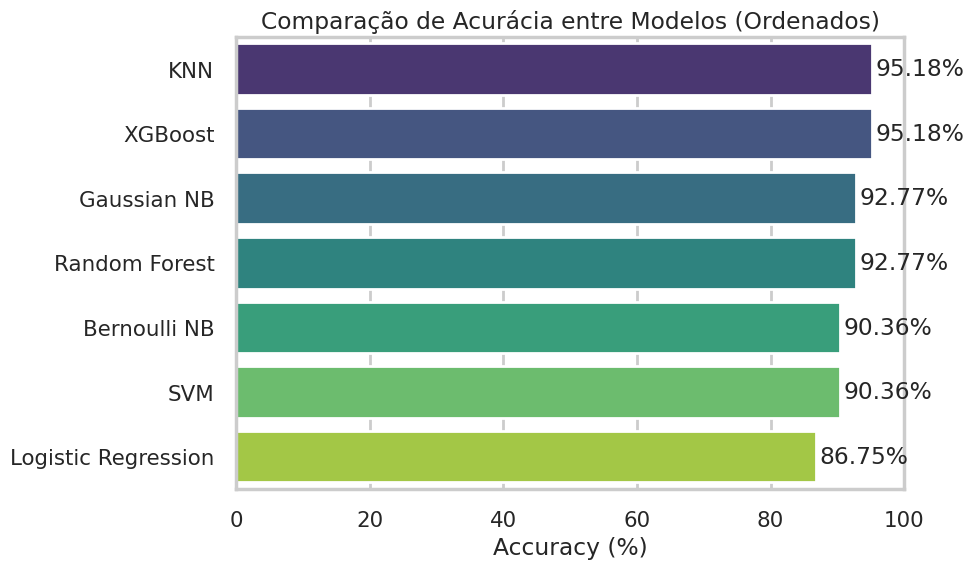

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados dos modelos e suas acurácias
models = ["Logistic Regression", "Gaussian NB", "Bernoulli NB", "SVM", "Random Forest", "KNN", "XGBoost"]
scores = [lr_acc, gnb_acc, bnb_acc, svm_acc, rfg_acc, knn_acc, xgb_acc]  # valores em porcentagem (ex: 87.5)

# Junta os modelos e scores, e ordena do maior para o menor
sorted_data = sorted(zip(models, scores), key=lambda x: x[1], reverse=True)
sorted_models = [item[0] for item in sorted_data]
sorted_scores = [item[1] for item in sorted_data]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_scores, y=sorted_models, palette="viridis")
plt.xlabel("Accuracy (%)")
plt.title("Comparação de Acurácia entre Modelos (Ordenados)")
plt.xlim(0, 100)

# Adiciona os valores no gráfico
for index, value in enumerate(sorted_scores):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center')

plt.tight_layout()
plt.show()


## Gráfico de comparação Recall

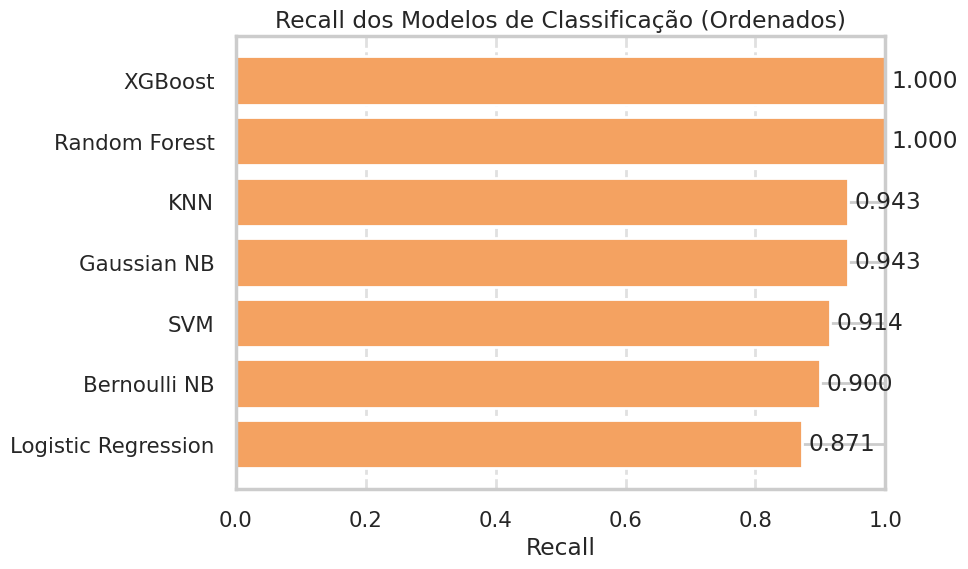

In [ ]:
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

# Cálculo dos recalls para cada modelo
recall_scores = {
    "Logistic Regression": recall_score(y_test, lr_pred),
    "Gaussian NB": recall_score(y_test, gnb_pred),
    "Bernoulli NB": recall_score(y_test, bnb_pred),
    "SVM": recall_score(y_test, svm_pred),
    "Random Forest": recall_score(y_test, rfg_pred),
    "KNN": recall_score(y_test, knn_pred),
    "XGBoost": recall_score(y_test, xgb_pred),
}

# Ordenar por recall (decrescente)
sorted_recall = sorted(recall_scores.items(), key=lambda x: x[1], reverse=False)
models = [item[0] for item in sorted_recall]
recalls = [item[1] for item in sorted_recall]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(models, recalls, color="#f4a261")
plt.xlabel("Recall")
plt.title("Recall dos Modelos de Classificação (Ordenados)")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
for index, value in enumerate(recalls):
    plt.text(value + 0.01, index, f"{value:.3f}", va='center')
plt.tight_layout()
plt.show()


## Grafico de comparação Precisão

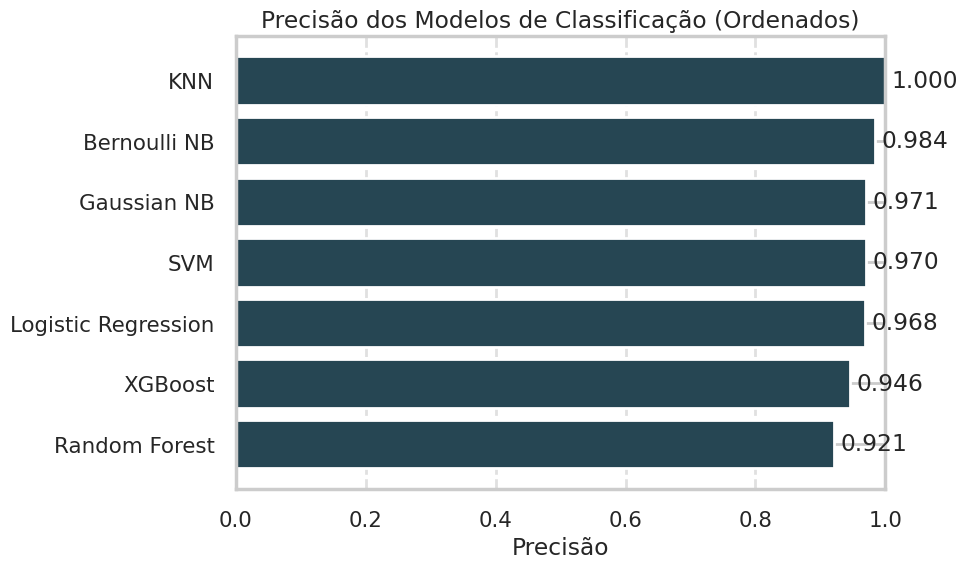

In [ ]:
from sklearn.metrics import precision_score

# Cálculo das precisões para cada modelo
precision_scores = {
    "Logistic Regression": precision_score(y_test, lr_pred),
    "Gaussian NB": precision_score(y_test, gnb_pred),
    "Bernoulli NB": precision_score(y_test, bnb_pred),
    "SVM": precision_score(y_test, svm_pred),
    "Random Forest": precision_score(y_test, rfg_pred),
    "KNN": precision_score(y_test, knn_pred),
    "XGBoost": precision_score(y_test, xgb_pred),
}

# Ordenar por precisão (decrescente)
sorted_precision = sorted(precision_scores.items(), key=lambda x: x[1], reverse=False)
models = [item[0] for item in sorted_precision]
precisions = [item[1] for item in sorted_precision]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(models, precisions, color="#264653")
plt.xlabel("Precisão")
plt.title("Precisão dos Modelos de Classificação (Ordenados)")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
for index, value in enumerate(precisions):
    plt.text(value + 0.01, index, f"{value:.3f}", va='center')
plt.tight_layout()
plt.show()


## Tabela de comparação dos modelos

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Dicionário de modelos treinados
model_objs = {
    'Logistic Regression': lr,
    'Gaussian NB':         gnb,
    'Bernoulli NB':        bnb,
    'KNN':                 knn,
    'Random Forest':       rfg,
    'XGBoost':             xgb,
    'SVM':                 svm
}

# Inicializar a lista dos resultados
results_list = []

for name, model in model_objs.items():
    # Classes preditas
    y_pred = model.predict(x_test)
    # Acurácia
    acc = accuracy_score(y_test, y_pred)
    # F1-score (binário)
    f1 = f1_score(y_test, y_pred)
    # Precisão
    prec = precision_score(y_test, y_pred)
    # Recall
    rec = recall_score(y_test, y_pred)
    # AUC - considerar score contínuo (probabilidade para classe 1)
    if name == 'SVM':
        # Se seu SVM NÃO foi treinado com probability=True, use decision_function:
        scores = model.decision_function(x_test)
    else:
        # Probabilidade da classe 1
        scores = model.predict_proba(x_test)[:,1]
    auc = roc_auc_score(y_test, scores)
    # Adicionar na lista
    results_list.append({
        'Modelo': name,
        'Acurácia': acc,
        'F1-Score': f1,
        'Precisão': prec,
        'Recall': rec,
        'AUC': auc
    })

# Criar DataFrame de Resultados
results_df = pd.DataFrame(results_list)
# OPTIONAL: ordenar do maior AUC para menor
results_df = results_df.sort_values(by='AUC', ascending=False).reset_index(drop=True)

# Exibir tabela
results_df

,Modelo,Acurácia,F1-Score,Precisão,Recall,AUC
0,Random Forest,0.927711,0.958904,0.921053,1.000000,0.991209
1,KNN,0.951807,0.970588,1.000000,0.942857,0.984615
2,XGBoost,0.951807,0.972222,0.945946,1.000000,0.984615
3,SVM,0.903614,0.941176,0.969697,0.914286,0.967033
4,Logistic Regression,0.867470,0.917293,0.968254,0.871429,0.965934
5,Bernoulli NB,0.903614,0.940299,0.984375,0.900000,0.942857
6,Gaussian NB,0.927711,0.956522,0.970588,0.942857,0.896703


In [ ]:
# prompt: Faça a tabela da mesma forma que anteriormente,  com o resultado dos 7 modelos usando a base de dados masculina

# Resultados para Dados Masculinos
results_male_list = []

model_male_objs = {
    'Logistic Regression': lr_male,
    'Gaussian NB':         gnb_male,
    'Bernoulli NB':        bnb_male,
    'KNN':                 knn_male,
    'Random Forest':       rfg_male,
    'XGBoost':             xgb_male,
    'SVM':                 svm_male
}


for name, model in model_male_objs.items():
    y_male_pred = model.predict(x_male_test)
    acc_male = accuracy_score(y_male_test, y_male_pred)
    f1_male = f1_score(y_male_test, y_male_pred)
    prec_male = precision_score(y_male_test, y_male_pred)
    rec_male = recall_score(y_male_test, y_male_pred)

    if name == 'SVM':
        scores_male = model.decision_function(x_male_test)
    else:
        scores_male = model.predict_proba(x_male_test)[:,1]
    auc_male = roc_auc_score(y_male_test, scores_male)

    results_male_list.append({
        'Modelo': name,
        'Acurácia': acc_male,
        'F1-Score': f1_male,
        'Precisão': prec_male,
        'Recall': rec_male,
        'AUC': auc_male
    })

results_male_df = pd.DataFrame(results_male_list)
results_male_df = results_male_df.sort_values(by='AUC', ascending=False).reset_index(drop=True)

print("\nTabela de Resultados para Dados Masculinos:")
results_male_df


Tabela de Resultados para Dados Masculinos:


,Modelo,Acurácia,F1-Score,Precisão,Recall,AUC
0,Random Forest,0.906977,0.945946,0.972222,0.921053,0.957895
1,Gaussian NB,0.930233,0.958904,1.000000,0.921053,0.947368
2,Bernoulli NB,0.837209,0.898551,1.000000,0.815789,0.942105
3,KNN,0.837209,0.898551,1.000000,0.815789,0.934211
4,XGBoost,0.906977,0.944444,1.000000,0.894737,0.905263
5,Logistic Regression,0.813953,0.882353,1.000000,0.789474,0.900000
6,SVM,0.837209,0.898551,1.000000,0.815789,0.884211


In [ ]:
# prompt: Faça a tabela da mesma forma que anteriormente,  com o resultado dos 7 modelos usando a base de dados feminina

# Resultados para Dados Femininos
results_female_list = []

model_female_objs = {
    'Logistic Regression': lr_female,
    'Gaussian NB':         gnb_female,
    'Bernoulli NB':        bnb_female,
    'KNN':                 knn_female,
    'Random Forest':       rfg_female,
    'XGBoost':             xgb_female,
    'SVM':                 svm_female
}

for name, model in model_female_objs.items():
    y_female_pred = model.predict(x_female_test)
    acc_female = accuracy_score(y_female_test, y_female_pred)
    f1_female = f1_score(y_female_test, y_female_pred)
    prec_female = precision_score(y_female_test, y_female_pred)
    rec_female = recall_score(y_female_test, y_female_pred)

    if name == 'SVM':
        scores_female = model.decision_function(x_female_test)
    else:
        scores_female = model.predict_proba(x_female_test)[:,1]
    auc_female = roc_auc_score(y_female_test, scores_female)

    results_female_list.append({
        'Modelo': name,
        'Acurácia': acc_female,
        'F1-Score': f1_female,
        'Precisão': prec_female,
        'Recall': rec_female,
        'AUC': auc_female
    })

results_female_df = pd.DataFrame(results_female_list)
results_female_df = results_female_df.sort_values(by='AUC', ascending=False).reset_index(drop=True)

print("\nTabela de Resultados para Dados Femininos:")
results_female_df


Tabela de Resultados para Dados Femininos:


,Modelo,Acurácia,F1-Score,Precisão,Recall,AUC
0,Bernoulli NB,0.902439,0.933333,0.933333,0.933333,0.951515
1,Logistic Regression,0.926829,0.949153,0.965517,0.933333,0.945455
2,XGBoost,0.853659,0.903226,0.875000,0.933333,0.930303
3,SVM,0.902439,0.933333,0.933333,0.933333,0.924242
4,KNN,0.926829,0.949153,0.965517,0.933333,0.921212
5,Random Forest,0.829268,0.888889,0.848485,0.933333,0.913636
6,Gaussian NB,0.804878,0.862069,0.892857,0.833333,0.825758
